# Supervised Learning

はじめに述べたように、教師あり機械学習は、最も一般的に使用され成功しているタイプの機械学習の1つです。この章では、教師あり学習についてさらに詳しく説明し、いくつかの一般的な教師あり学習アルゴリズムについて説明します。

前の章ですでに教師付き機械学習のアプリケーションを見ました。フローラーの物理的測定を使用して、アイリスの花をいくつかの種に分類します。特定の入力から特定の結果を予測する場合は常に教師あり学習が使用され、入力と出力のペアの例があることに注意してください。トレーニングセットを構成するこれらの入出力ペアから機械学習モデルを構築します。私たちの目標は、これまでにない新しいデータを正確に予測することです。

教師あり学習では、トレーニングセットを構築するために人間の労力が必要になることがよくありますが、後で自動化され、そうでなければ面倒な、または実行不可能なタスクが高速化されます。

## Classification and Regression

教師付き機械学習アルゴリズムには、分類と回帰という2つの主要なタイプがあります。

分類の目的は、事前定義された可能性のリストから選択するクラスラベルを予測することです。第1章（はじめに）では、虹彩を3つの可能な種の1つに分類する例を使用しました。分類は、2つの分類に正確に2つのクラスを区別する特別なケースであるバイナリ分類と、3つ以上のクラスを分類するマルチクラス分類に分けられることがあります。

電子メールをスパムかそうでないかに分類することは、バイナリ分類問題の例です。このバイナリ分類タスクでは、はいまたはいいえの質問が「このメールはスパムですか？」になります。

[情報ボックス]
バイナリ分類では、1つのクラスがポジティブクラスで、もう1つのクラスがネガティブクラスであるとよく言われます。
ここで、ポジティブは利益や価値を表すのではなく、研究の対象を表しています。
したがって、スパムを探す場合、「ポジティブ」はスパムクラスを意味する可能性があります。
2つのクラスのどちらがポジティブと呼ばれるかは主観的な方法であることが多く、ドメインに固有です。FI

[/info box]
一方、虹彩の例は、マルチクラス分類問題の例です。

マルチクラス分類問題のもう1つの例は、WebサイトのテキストからWebサイトの言語を予測することです。
ここでのクラスは、可能な言語の事前定義されたリストになります。

回帰タスクの目標は、連続数、またはプログラミング用語の浮動小数点数（数学用語では実数）を予測することです。
教育からの個人の年収、年齢、居住地を予測することは、回帰タスクの例です。
収入を予測する場合、予測値は金額であり、特定の範囲内の任意の数値にすることができます。
回帰タスクのもう1つの例は、以前の収穫量、天候、農場で働いている従業員数などの属性が与えられたトウモロコシ農場の収穫量を予測することです。
ここでも利回りは任意の数値にすることができます。

分類タスクと回帰タスクを区別する簡単な方法は、出力になんらかの順序または連続性があるかどうかを確認することです。
順序付け、または考えられる結果間の連続性がある場合、問題は回帰問題です。

年収を予測することを考えてください。
「より多くのお金を稼ぐ」または「より少ないお金を稼ぐ」という明確な順序があります。
年間40.000ドルは、年間50.000ドルから年間30.000ドルの間であるという自然な理解があります。
出力にも連続性があります。
人が年間40,000ドルまたは40,001ドルを稼ぐかどうかは、たとえ金額が異なっていても、目に見える違いはありません。
したがって、アルゴリズムが＄39,999または＄40,001を予測していても、＄40,000を予測していたとしても、それほど問題ではありません。

対照的に、Webサイトの言語を認識するタスク（これは分類の問題です）には、程度の問題はありません。
Webサイトが1つの言語であるか、別の言語である。
言語間の連続性はなく、英語とフランス語の間の言語もありません［脚注：言語学者には、言語の単純化された表現を別個の固定された実体として言い訳することを許してください］。

## Generalization, Overfitting and Underfitting

教師あり学習では、トレーニングデータに基づいてモデルを構築し、使用したトレーニングセットと同じ特性を持つ新しい目に見えないデータを正確に予測できるようにします。
モデルが目に見えないデータに対して正確な予測を行うことができる場合、トレーニングセットからテストセットに一般化できると言えます。

できるだけ一般化できるモデルを構築したいと考えています。

通常、トレーニングセットに対して正確な予測ができるような方法でモデルを構築します。トレーニングとテストセットに十分な共通点がある場合、モデルはテストセットでも正確であることが期待されます。
ただし、これがうまくいかない場合もあります。

たとえば、非常に複雑なモデルを自分で作成できるようにした場合、トレーニングセットで好きなだけ正確にすることができます。

構成された例を見てみましょう。
初心者のデータサイエンティストが人の給与を予測したいとします。
各人の唯一の特徴は生年月日です。データセットは次のようになります。

|Date of Birth|Annual salary ($)|
|-|-|
|30/4/1950|50500|
|05/8/1964|41000|
|09/2/2001|35200|
|17/5/1989|36000|

私たちの初心者データサイエンティストは、機械学習アルゴリズムを数値で提示する必要があることを知っているため、2016年に、分析時に生年月日を各人の年齢で置き換えます。
科学者は、社会保障番号の下4桁、家の番号、郵便番号、および子供の数も追加します。

データは次のようになります。

|Age|SSN|House|ZIP|Children|Annual salary ($)|
|-|-|-|-|-|-|
|66|1882|19|10030|2|50500|
|52|1337|2|10028|0|41000|
|22|3467|8|10041|1|35200|
|25|8391|27|10009|4|36000|

現在、彼は最初の3行をトレーニングセットとして使用して機械学習モデルを構築しています。
アルゴリズムが後でどのように機能するかを保存しましょう。
アルゴリズムは、年間給与について次の式を生成します。

salary = 333 * x[0] + 1 * x[1] + 237 * x[2] - 20 * x[3] + 26 * x[4] + 225866

ここで、x [0]からx [4]には、年齢、SSNの最後の桁、家の番号、郵便番号、および子供の数が含まれています。

この式は、データセットの最初の3行であるトレーニングセットで非常にうまく機能します。
トレーニングセットの予測は53681、44433、37761であり、真の値に非常に近いです。

ただし、式がトレーニングセットの一部ではないデータセットの4番目のポイントに対して行う予測は48905であり、これは目的の出力である36000からかなり離れています。

ここで何が起こったのですか？データサイエンティストは、彼の機械学習アルゴリズムが5つの機能と出力（年間給与）の間に比較的複雑な相互作用を構築できるようにしました。
結果は、現実世界の関係を反映しないモデルです。たとえば、このモデルでは、隣の家に移動すると＄237が増えると予測しています（237はx[2]の係数です！

トレーニングセットではうまく機能するが、新しいデータに一般化されない複雑なモデルを構築することは、トレーニングデータの特殊性に重点を置いているため、オーバーフィッティングと呼ばれます。
過剰適合を回避することは、成功する機械学習モデルを構築するための重要な側面です。
過剰適合を回避する良い方法は、非常に単純なモデルの作成に制限することです。

給与予測タスクのはるかに単純なモデルは、トレーニングセットの3人の平均給与を常に予測することです。

すべての人の給与が42233であると予測することは明らかに単純すぎるため、トレーニングセットの変化をうまく捉えることはできません。
純すぎるモデルを使用することはアンダーフィッティングと呼ばれます。
トレーニングデータのターゲット出力について十分に説明していないためです。

給与予測の中間点は、年齢を単一の機能として使用することです。
これにより、非常に単純なモデルに制限されますが、データのいくつかの傾向を取得することができます。

年齢特徴のみを含むモデルは次のとおりです。

salary = 323 * age + 27146

このモデルは、トレーニングセットの48464、43942、および34252の予測を行います。
これは、以前のモデルほど良くありません。

ただし、以前に使用した複雑なモデルと比較すると、テストセットに対して一般化されています。
表の4行目は35221と予測されます。

過剰適合と過適合のトレードオフを図model_complexityに示します。
<!-- ![](model_complexity.png) -->
<!-- <img src="./model_complexity.png"> -->

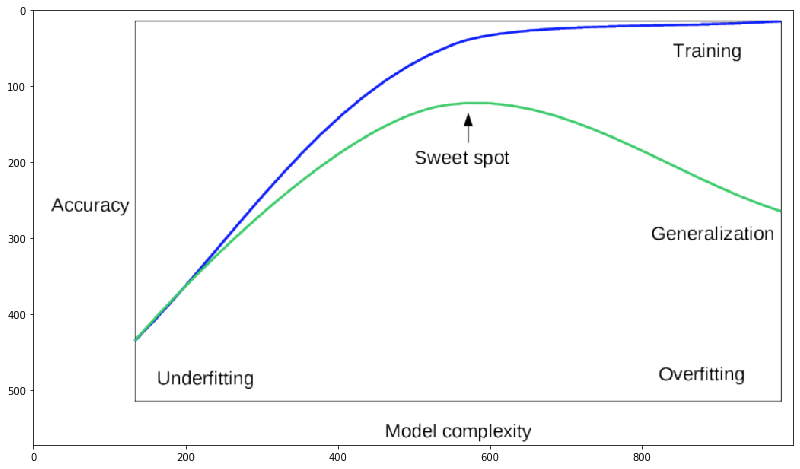

In [1]:
import matplotlib.pyplot as plt
file_name = "images/model_complexity.png"
mc = plt.imread(file_name)
plt.figure(figsize=(15, 8))
plt.imshow(mc)

単純すぎるモデルを使用することを選択した場合、平均予測のみを使用する場合と同様に、トレーニングセットに対しては同様に、テストセットに対しても同様に悪影響を及ぼします。

モデルを複雑にするほど、トレーニングデータをより正確に予測できるようになります。
ただし、モデルが複雑になりすぎると、トレーニングセットの特殊性に集中しすぎて、モデルが新しいデータにうまく一般化できなくなります。

その間にスイートスポットがあり、最適な汎化パフォーマンスが得られます。
これが私たちが見つけたいモデルです。

モデルの複雑さの影響を理解することは難しく、機械学習モデルの種類ごとに異なる意味があります。

## Supervised Machine Learning Algorithms

次に、最も一般的な機械学習アルゴリズムについて説明し、データから学習する方法と予測を行う方法を説明します。
また、モデルの複雑さの概念が各モデルでどのように機能するかについても説明します。

各アルゴリズムの詳細な説明はこの本の範囲を超えていますが、各アルゴリズムがどのようにモデルを構築するかについて直観を示すようにします。

また、各アルゴリズムの長所と短所、およびそれらがどのデータに最もよく適用できるかについても説明します。
最も重要なパラメータとオプションの意味についても説明します。
それらのすべてを議論することは本の範囲を超えており、詳細についてはscikit-learnのドキュメントを参照してください。

多くのアルゴリズムには分類と回帰バリアントがあり、両方について説明します。

各アルゴリズムの説明を詳細に読む必要はありませんが、モデルを理解すると、機械学習アルゴリズムが機能するさまざまな方法をよりよく理解できます。
この章はリファレンスガイドとしても使用できます。
アルゴリズムの動作が不明な場合は、この章に戻ることができます。

いくつかのデータセットを使用して、さまざまなアルゴリズムを説明します。
一部のデータセットは、アルゴリズムの特定の側面を強調するように設計された、小さな合成（つまり、作成された）データセットです。
その他のデータセットは、実際のサンプルデータセットよりも大きくなります。

合成2クラス分類データセットの例は、2つの機能を持つフォージデータセットです。以下は、このデータセットのすべてのデータポイントを視覚化した散布図です。
プロットのx軸には最初の特徴があり、y軸には2番目の特徴があります。
散布図では常にそうであるように、各データポイントは1つのドットとして表されます。
ドットの色はクラスを示し、赤はクラス0、青はクラス1を意味します。

In [2]:
# pip install mglearn
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

# /opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87:
# FutureWarning: Function make_blobs is deprecated;
# Please import make_blobs directly from scikit-learn
# warnings.warn(msg, category=FutureWarning)

from sklearn.datasets import make_blobs

X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print('X.shape: %s' % (X.shape,))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


X.shapeからわかるように、このデータセットは2つの特徴を持つ26のデータポイントで構成されています。

回帰アルゴリズムを説明するために、以下に示す合成波データセットを使用します。 Waveデータセットには、単一の入力フィーチャと、モデル化する連続ターゲット変数（または応答）のみがあります。

以下のプロットは、x軸に単一の特徴を示しており、データポイントは緑色の点として示されています。各データポイントについて、ターゲット出力はy軸に青でプロットされます。

(-3.1, 3.1)

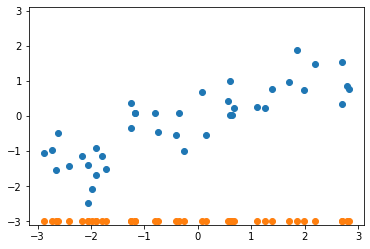

In [3]:
import numpy as np
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3.1, 3.1)

コンピューターモニターには2つの次元があるため、3つ以上の機能を持つデータを表示することは困難です。
機能の少ないデータセット（低次元データセットとも呼ばれる）から派生した直感は、機能の多いデータセット（高次元データセット）では保持されない可能性があります。
それを覚えている限り、低次元のデータセットのアルゴリズムを検査することは非常に有益です。

これらの小さな合成データセットを、scikit-learnに含まれている2つの実際のデータセットで補完します。
1つはウィスコンシン乳がんデータセット（または略してがん）で、乳がん腫瘍の臨床測定値を記録します。
各腫瘍には「良性」（無害な腫瘍の場合）または「悪性」（癌性腫瘍の場合）のラベルが付けられ、組織の測定に基づいて腫瘍が悪性かどうかを予測することを学習します。

データは、scikit-learnのload_breast_cancerを使用してロードできます。 scikit-learnに含まれるデータセットは通常、データセットと実際のデータに関する情報を含むBunchオブジェクトとして保存されます。

Bunchオブジェクトについて知っておく必要があるのは、オブジェクトが辞書のように動作することだけです。
ドットを使用して値にアクセスできるという利点もあります（bunch ['key']ではなくbunch.keyのように）。

In [4]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

データセットは、それぞれ30個の特徴を持つ569個のデータポイントで構成されています。

In [5]:
print(cancer.data.shape)

(569, 30)


これらの569個のデータポイントのうち、212個は悪性、357個は良性とラベル付けされています。

In [6]:
print(cancer['target_names'])
np.bincount(cancer['target'])

['malignant' 'benign']


array([212, 357])

各機能の意味の説明を取得するには、feature_names属性を確認します。

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

興味があれば、cancer.DESCRを読んでデータの詳細を確認できます。

In [8]:
cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

また、実際の回帰データセットであるBoston Housingデータセットを使用します。
このデータセットに関連付けられたタスクは、犯罪率、チャールズ川への近さ、高速道路のアクセス可能性などの近隣に関する情報を使用して、1970年代のボストンのいくつかの近隣における住宅の中央値を予測することです。

データセットには、13の機能によって記述される506のデータポイントが含まれています。

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
boston.keys()

(506, 13)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

この場合も、ボストンのDESCR属性を読み取ることにより、データセットに関する詳細情報を取得できます。

ここでの目的のために、これらの13の測定値を入力特徴として考慮するだけでなく、特徴間のすべての製品（相互作用とも呼ばれる）も調べることにより、このデータセットを実際に拡張します。

つまり、犯罪率と高速道路のアクセシビリティだけでなく、犯罪率と高速道路のアクセシビリティの積も考慮します。
このような派生機能を含めることは特徴量エンジニアリング(feature engineering)と呼ばれ、第5章（データの表現）で詳しく説明します。

この派生データセットは、load_extended_boston関数を使用してロードできます。

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


結果の104特徴は、13の元の特徴、13から2つを選択= 91（脚注：13エレメントから2エレメントを選択する方法の数）特徴で、2つの特徴と1つの定数特徴の積です。

これらのデータセットを使用して、さまざまな機械学習アルゴリズムの特性を説明および例示します。
しかし、とりあえず、アルゴリズム自体について見ていきましょう。最初に、前の章ですでに見たk-Nearest Neighborアルゴリズムを再検討します。

## k-Nearest Neighbor

k-Nearest Neighbors（kNN）アルゴリズムは、おそらく最も単純な機械学習アルゴリズムです。
モデルの構築は、トレーニングデータセットの格納のみで構成されます。
新しいデータポイントの予測を行うために、アルゴリズムはトレーニングデータセット内の最も近いデータポイント、つまり「最近傍」を見つけます。

### k-Neighbors Classification

最も単純なバージョンでは、アルゴリズムは1つの最近傍のみを考慮します。
これは、予測したいポイントに最も近いトレーニングデータポイントです。

予測は、このトレーニングポイントの既知の出力になります。

図forge_one_neighborは、forgeデータセットの分類の場合のこれを示しています。

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'forge_one_neighbor')

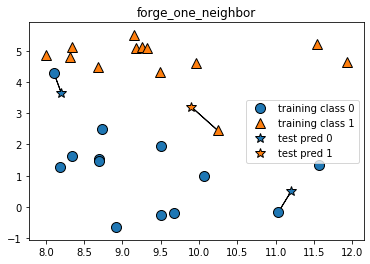

In [11]:
# /opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87:
# FutureWarning: Function make_blobs is deprecated;
# Please import make_blobs directly from scikit-learn
# warnings.warn(msg, category=FutureWarning)

from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title('forge_one_neighbor')

ここでは、星印で示される3つの新しいデータポイントを追加しました。
それらのそれぞれについて、トレーニングセットの最も近いポイントをマークしました。
最近傍アルゴリズムの予測は、そのポイントのラベルです（星印の色で示されます）。

最も近い近傍のみを考慮する代わりに、任意の数のkの近傍を考慮することもできます。これがkネイバーアルゴリズムの名前の由来です。
複数のネイバーを検討する場合、投票を使用してラベルを割り当てます。
つまり、テストポイントごとに、赤である隣人の数と青である隣人の数を数えます。
次に、より頻度の高いクラスを割り当てます。
つまり、k個の隣接ノードの中で多数のクラスです。

以下は、3つの最近傍を使用した図です。
繰り返しになりますが、予測は十字の色で表示されます。
左上にあるポイントの予測が、1つの近傍のみを使用した場合とは異なっていることがわかります。

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


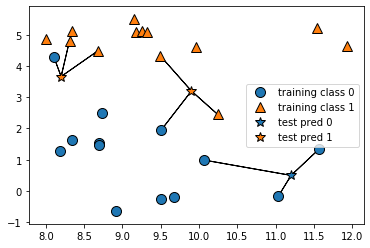

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

この図はバイナリ分類の問題を表していますが、これが任意の数のクラスで機能していることを想像できます。
さらに多くのクラスについて、各クラスに属する近隣の数を数え、最も一般的なクラスを予測します。

次に、scikitlearnを使用してk最近傍アルゴリズムを適用する方法を見てみましょう。

最初に、データをトレーニングセットとテストセットに分割し、第1章（概要）で説明したように、汎化パフォーマンスを評価できるようにします。

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


次に、クラスをインポートしてインスタンス化します。
これは、使用するネイバーの数などのパラメーターを設定できる場合です。ここでは、3に設定します。

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

次に、トレーニングセットを使用して分類子を近似します。
KNeighborsClassifierの場合、これはデータセットを格納することを意味するため、予測中に近傍を計算できます。

In [15]:
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

テストデータを予測するには、predictメソッドを呼び出します。
これは、トレーニングセットの最近傍を計算し、これらの中で最も一般的なクラスを見つけます。

In [16]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

モデルの一般化の程度を評価するには、テストデータとテストラベルを使用して、scoreメソッドを呼び出します。

In [17]:
clf.score(X_test, y_test)

0.8571428571428571

モデルの精度は約86％であることがわかります。
つまり、モデルは、テストデータセット内のサンプルの85％についてクラスを正しく予測しました。

### Analyzing KNeighborsClassifier

2次元データセットの場合は、xy平面内のすべての可能なテストポイントの予測を示すこともできます。
ポイントに赤いクラスが割り当てられる領域では平面を赤で着色し、そうでない場合は青で着色します。
これにより、アルゴリズムがクラス赤を割り当てる場所とクラス青を割り当てる場所の間の分割である決定境界を表示できます。

これは、1つ、3つ、および5つの近傍の決定境界を視覚化したものです。

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("{} neighbor(s)".format(n_neighbors), color='w')
    ax.set_xlabel('feature 0', color='w')
    ax.set_ylabel('feature 1', color='w')
axes[0].legend(loc=3)

In [19]:
X[:, 0]

array([ 9.96346605, 11.0329545 , 11.54155807,  8.69289001,  8.1062269 ,
        8.30988863, 11.93027136,  9.67284681,  8.34810316,  8.67494727,
        9.17748385, 10.24028948,  8.68937095,  8.92229526,  9.49123469,
        9.25694192,  7.99815287,  8.18378052,  8.7337095 ,  9.32298256,
       10.06393839,  9.50048972,  8.34468785,  9.50169345,  9.15072323,
       11.563957  ])

In [20]:
X[:, 1]

array([ 4.59676542, -0.16816717,  5.21116083,  1.54322016,  4.28695977,
        4.80623966,  4.64866327, -0.20283165,  5.13415623,  4.47573059,
        5.09283177,  2.45544401,  1.48709629, -0.63993225,  4.33224792,
        5.13284858,  4.8525051 ,  1.29564214,  2.49162431,  5.09840649,
        0.99078055, -0.26430318,  1.63824349,  1.93824624,  5.49832246,
        1.3389402 ])

In [21]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

左の図からわかるように、単一の近傍を使用すると、トレーニングデータに厳密に従う決定境界が生成されます。
ますます多くの近傍を考慮することは、よりスムーズな決定境界につながります。
滑らかな境界は単純なモデルに対応します。
つまり、少数の近傍を使用すると、モデルの複雑度が高くなり（図model_complexityの右側に表示）、
多数の近傍を使用すると、モデルの複雑度が低くなります（図model_complexityの左側に表示）。

上記で説明したモデルの複雑さと一般化の間の関係を確認できるかどうかを調べてみましょう。

実際の乳がんデータセットでこれを行います。

データセットをトレーニングとテストセットに分割することから始めます。
次に、さまざまな数のネイバーでトレーニングとテストセットのパフォーマンスを評価します。

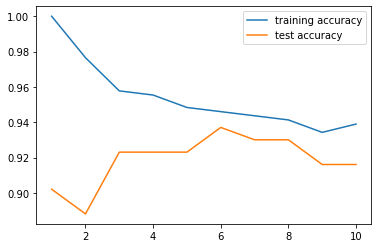

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # building the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record trainig set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

プロットは、x軸のn_neighborsの設定に対するy軸のトレーニングとテストセットの精度を示しています。
現実世界のプロットがめったにスムーズでない場合でも、過剰適合と過少適合のいくつかの特性を認識できます。
近隣の数が少ないほど、より複雑なモデルに対応するため、図はmodel_complexityの図に対して水平に反転します。

単一の最近傍を考えると、トレーニングセットの予測は完璧です。
より多くの近傍を考慮すると、モデルはより単純になり、トレーニング精度は低下します。

単一の近傍を 使用する場合のテストセットの精度は、より多くの近傍を使用する場合よりも低く、単一の最近傍を使用するとモデルが複雑すぎることを示します。
一方、10個の近傍を考慮すると、モデルが単純すぎるため、パフォーマンスがさらに低下します。
最高のパフォーマンスは、6つのネイバーを使用することで、中央のどこかにあります。

それでも、プロットのスケールを覚えておくことは良いことです。
最悪のパフォーマンスは約88％の精度ですが、それでも許容範囲内です。

### K-Neighbors Regression

k最近傍アルゴリズムの回帰バリアントもあります。
繰り返しますが、今度は波のデータセットを使用して、単一の最近傍を使用することから始めましょう。 
x軸上の緑の十字として3つのテストデータポイントを追加しました。

単一の近傍を使用した予測は、最も近い近傍のターゲット値であり、青い十字で示されています。

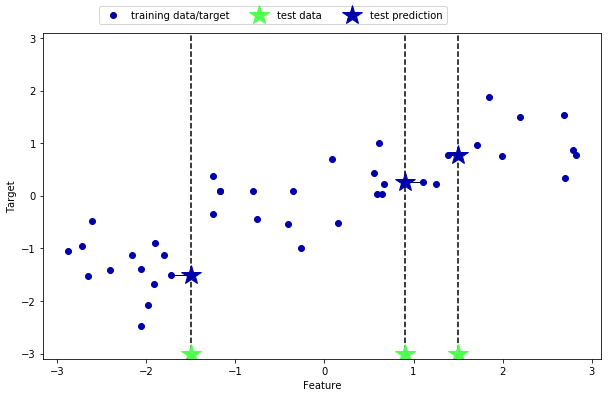

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

この場合も、回帰に複数の最近傍を使用できます。
回帰に複数の最近傍を使用する場合、予測は関連する近傍の平均（または平均）です。

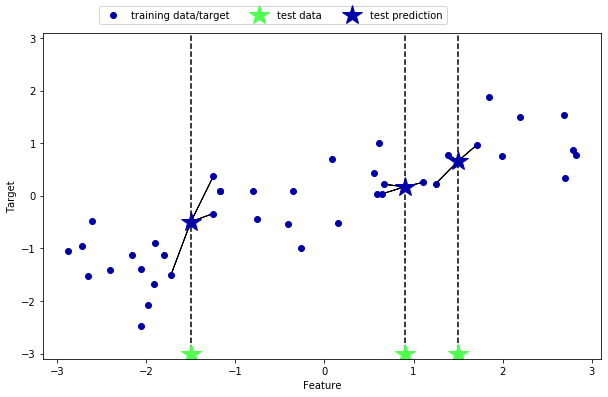

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

回帰用のk最近傍アルゴリズムは、scikit-learnのKNeighbors Regressorクラスに実装されています。

これを使用すると、上記のKNeighborsClassifierによく似ています。

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantinate the model, set the number of neibors to consider to 3:
req = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets:
req.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                   metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                    weights='uniform')

これで、テストセットで予測を行うことができます。

In [26]:
req.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

また、スコアリングメソッドを使用してモデルを評価することもできます。これは、regressorの場合、$R^2$スコアを返します。

$R^2$スコアは決定係数とも呼ばれ、回帰モデルの予測の良さの尺度であり、スコアは最大1になります。
値1は完全な予測に対応し、値0は、トレーニングセットの応答y_trainの平均を予測するだけの定数モデルに対応します。

In [27]:
req.score(X_test, y_test)

0.8344172446249604

ここでは、スコアは0.83であり、比較的適切なモデルフィットを示しています。

**Analyzing k nearest neighbors regression**

1次元のデータセットでは、可能なすべての特徴値の予測がどのように見えるかを確認できます。
これを行うには、ライン上の多数のポイントで構成されるテストデータセットを作成します。

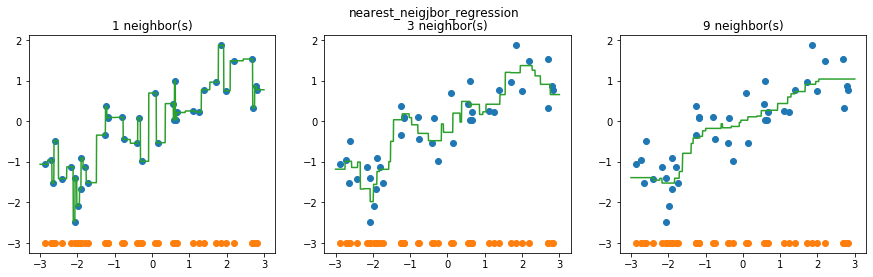

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("nearest_neigjbor_regression")
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, 'o')
    ax.plot(X, -3 * np.ones(len(X)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)

上記のプロットでは、青い点がトレーニングデータの応答ですが、赤い線はモデルが線上のすべての点に対して行った予測です。

単一の近傍のみを使用すると、トレーニングセットの各ポイントは予測に明らかな影響を与え、予測値はすべてのデータポイントを通過します。
これは非常に不安定な予測につながります。
より多くの近傍を考慮すると、予測はよりスムーズになりますが、これらはトレーニングデータにも適合しません。

**Strengths, weaknesses and parameters**

原則として、KNeighbors classifier(分類器)には2つの重要なパラメーターがあります。
近傍数とデータポイント間の距離の測定方法です。
実際には、3や5のような少数のネイバーを使用することはしばしばうまくいきますが、このパラメーターを確実に調整する必要があります。
適切な距離測定を選択することは、この本の範囲をやや超えています。
デフォルトでは、ユークリッド距離が使用されます。
これは多くの設定でうまく機能します。

最近傍の強みの1つは、モデルが非常に理解しやすく、多くの調整を行わなくても妥当なパフォーマンスが得られることです。最近傍を使用することは、より高度な手法を検討する前に試すのに適したベースライン手法です。
最近傍モデルの構築は通常非常に高速ですが、トレーニングセットが非常に大きい場合（特徴の数またはサンプルの数のいずれか）、予測は遅くなる可能性があります。

最近傍を使用する場合、データを前処理することが重要です（第3章「教師なし学習」を参照）。
最近傍は、非常に多くの機能を持つデータセット、特にスパースデータセット、つまり多くの機能がある一般的なタイプのデータですが、特定のデータポイントで非ゼロである機能はごくわずかです。

したがって、最近傍アルゴリズムは理解が容易ですが、予測が遅く、多くの機能を処理できないため、実際にはあまり使用されません。次に説明する方法には、これらの欠点はありません。

## Linear models

線形モデルは、実際に広く使用されているモデルのクラスであり、過去数十年にわたって広く研究されており、そのルーツは100年以上遡ります。

線形モデルは、入力した特徴（機能）の線形関数を使用して予測を行うモデルです。これについては以下で説明します。

### Linear midel for regression

回帰の場合、線形モデルの一般的な予測式は次のようになります。

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b ~\text{(1) linear regression}
\end{align*}

ここで、$x[0]$から$x[p]$は単一のデータポイントの特徴（ここでは特徴の数は$p$）を示し、$ w $と$ b $は学習されるモデルのパラメーターです、そして$\hat{y}$はモデルが行う予測です。
単一の特徴を持つデータセットの場合、これは高校の数学の線の方程式として覚えているかもしれません。

ここで、$w[0]$は勾配、$b$はy軸のオフセットです。その他の特徴については、wには各特徴軸に沿った勾配が含まれます。
または、予測された応答を、wのエントリによって与えられる重み（負の場合もある）を使用した、入力特徴の重み付けされた合計と考えることができます。

1次元のwaveデータセットのパラメーター$ w [0] $と$ b $を学習しようとすると、次の行が表示される場合があります。

In [29]:
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


線にわかりやすくするために、プロットに座標クロスを追加しました。 
w [0]を見ると、勾配はおよそ.4であることがわかります。
これは、上のプロットで視覚的に確認できます。
切片は、予測線が0をわずかに下回るy軸と交差する場所です。
これは、画像でも確認できます。

回帰の線形モデルは、予測が単一の特徴の線、2つの特徴を使用するときの平面、または高次元の超平面（つまり、より多くの特徴をもつとき）である回帰モデルとして特徴付けることができます。

赤い線で行われた予測を、図nearest_neighbor_regressionのKNeighborsRegressorで行われた予測と比較すると、直線を使用して予測を行うことは非常に制限的であるように見えます。
データの細部がすべて失われているようです。
ある意味これは本当です。
これは、対象の$ y $が機能の線形結合であるという強力な（そして少し非現実的な）仮定です。
ただし、1次元データを見ると、多少ゆがんだ視点が得られます。多くの特徴を持つデータセットの場合、線形モデルは非常に強力です。
特に、トレーニングデータポイントよりも多くの機能がある場合、どのターゲット$ y $も（トレーニングセット上で）線形関数として完全にモデル化できます（脚注これは、線形代数を知っていれば簡単に確認できます）。

回帰には多くの異なる線形モデルがあります。これらのモデルの違いは、モデルパラメーター$ w $と$ b $がトレーニングデータからどのように学習されるか、およびモデルの複雑さをどのように制御できるかです。ここで、回帰の最も一般的な線形モデルについて説明します。

### Linear Regression aka Ordary Least Squares

線形回帰または通常の最小二乗（OLS）は、回帰の最も単純で最も古典的な線形法です。

線形回帰は、予測とトレーニングセットの真の回帰ターゲット$ y $との間の平均二乗誤差を最小化するパラメーター$ w $および$ b $を見つけます。平均二乗誤差は、予測と真の値の差の二乗の合計です。線形回帰にはパラメーターがないため、利点がありますが、モデルの複雑さを制御する方法もありません。

図XXにあるモデルを生成するコードを次に示します。

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

重みまたは係数とも呼ばれる「勾配」パラメーターwはcoef_属性に格納され、オフセットまたは切片bはintercept_属性に格納されます。 
［脚注：奇妙に見える末尾のアンダースコアに気付くかもしれません。 
Scikit-learnは常に線形モデルは、末尾のアンダースコアで終わる属性にトレーニングデータから派生したものを格納します。
それは、ユーザーが設定したパラメーターからそれらを分離することです。］

In [31]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


intercept_属性は常に1つの浮動小数点数ですが、coef_属性は入力フィーチャごとに1つのエントリを持つ派手な配列です。
waveデータセットには入力機能が1つしかないため、lr.coef_には1つのエントリしかありません。

トレーニングセットとテストセットのパフォーマンスを見てみましょう。

In [32]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score] %f" % lr.score(X_test, y_test))

training set score: 0.670089
test set score] 0.659337


約＄66の$R^2$はあまり良くありませんが、トレーニングとテストセットのスコアが非常に近いことがわかります。
これは、私たちが過剰適合ではなく、過小適合している可能性が高いことを意味します。
この1次元のデータセットでは、モデルが非常にシンプル（または制限されている）であるため、過剰適合の危険性はほとんどありません。

ただし、高次元のデータセット（多数の特徴を意味する）を使用すると、線形モデルがより強力になり、オーバーフィットの可能性が高くなります。

ボストン住宅データセットなどのより複雑なデータセットでLinearRegressionがどのように実行されるかを見てみましょう。
このデータセットには506のサンプルと105の派生機能があることに注意してください。

データセットを読み込み、トレーニングとテストセットに分割します。次に、以前のように線形回帰モデルを作成します。

In [33]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

トレーニングセットとテストセットのスコアを比較すると、トレーニングセットで非常に正確に予測していることがわかりますが、テストセットの$ R ^ 2 $ははるかに悪いです。

In [34]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952052
test set score: 0.607472


これは過剰適合の明らかな兆候であるため、複雑さを制御できるモデルを見つけようとする必要があります。

標準線形回帰の最も一般的に使用される代替手段の1つは、次に検討するリッジ回帰です。

### Ridge regression

リッジ回帰は回帰の線形モデルでもあるため、予測を行うために使用する式は、通常の最小二乗の場合と同様に式（1）のままです。
リッジ回帰では、係数wは、トレーニングデータで十分に予測できるように選択されるだけでなく、追加の制約があります。
また、係数の大きさを可能な限り小さくしたいとします。つまり、wのすべてのエントリは0に近い必要があります。

直感的には、これは、各特徴が結果に与える影響が可能な限り小さいこと（つまり、勾配が小さいことを意味します）でありながら、十分に予測できることを意味します。

この制約は、いわゆる正則化の一例です。正則化とは、過剰適合を避けるためにモデルを明示的に制限することを意味します。

リッジ回帰で使用される特定の種類は、l2正則化として知られています。
［脚注：数学的に、リッジは係数のl2ノルム、またはwのユークリッド長にペナルティを課します。］
リッジ回帰は、linear_model.Ridgeに実装されています。拡張されたボストンデータセットでどの程度うまく機能するか見てみましょう。

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.885797
test set score: 0.752768


ご覧のように、RidgeのトレーニングセットスコアはLinearRegressionよりも低く、テストセットスコアは高くなっています。
これは私たちの期待と一致しています。線形回帰では、データに適合しすぎていました。
リッジはより制限されたモデルであるため、オーバーフィットする可能性は低くなります。
モデルが複雑でないほど、トレーニングセットのパフォーマンスは低下しますが、一般化は向上します。

一般化のパフォーマンスのみに関心があるため、LinearRegressionモデルよりもRidgeモデルを選択する必要があります。

Ridgeモデルは、モデルの単純さ（係数がゼロに近い）とトレーニングセットでのパフォーマンスとの間にトレードオフをもたらします。
モデルがシンプルさとトレーニングセットのパフォーマンスをどの程度重視するかは、アルファパラメーターを使用してユーザーが指定できます。
上記では、デフォルトのパラメーターalpha = 1.0を使用しました。ただし、これが最善のトレードオフになる理由はありません。
alphaを増やすと、係数はゼロに近づき、トレーニングセットのパフォーマンスが低下しますが、一般化には役立ちます。

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.788279
test set score: 0.635941


アルファを小さくすると、係数の制限が緩和されます。つまり、図XXXで右に移動します。

alphaの値が非常に小さい場合、係数はほとんど制限されず、LinearRegressionに似たモデルになります。

In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928227
test set score: 0.772207


ここでは、alpha = 0.1がうまく機能しているようです。一般化を改善するために、アルファをさらに減らしてみることができます。
ここでは、図のmodel_complexityに示すように、パラメーターalphaがモデルの複雑度にどのように対応しているかに注目してください。
パラメータを適切に選択する方法については、第6章（モデルの選択）で説明します。

また、アルファの値が異なるモデルのcoef_属性を調べることにより、アルファパラメータがモデルをどのように変更するかについて、より定性的な洞察を得ることができます。
高いアルファはより制限されたモデルを意味するため、coef_のエントリは、アルファの低い値よりもアルファの高い値の方が小さいと予想されます。

これは、以下のプロットで確認されています。

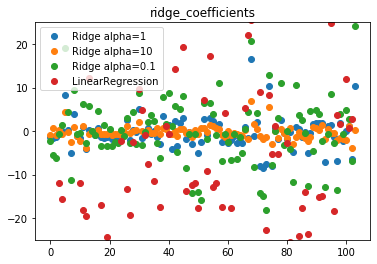

In [38]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()

ここで、x軸はcoef_のエントリを列挙します。
x= 0は最初のフィーチャに関連付けられた係数を示し、x = 1は2番目のフィーチャに関連付けられた係数を示します。
Y軸は、係数の対応する値の数値を示します。
ここでの主なポイントは、alpha = 10（緑のドットで表示）の場合、係数はほぼ-3から3の間であるということです。
alpha= 1のリッジモデルの係数（青いドットで表示） 、やや大きめです。
赤い点はまだ大きさが大きく、正則化なしの線形回帰（alpha = 0になる）に対応する多くの青緑の点は非常に大きいため、チャートの外側にもあります

### Lasso

線形回帰を正則化するためのRidgeの代替手段は、$lasso$です。$lasso$は、リッジ回帰と同様に、係数をゼロに近づけるように制限しますが、「l1」正則化と呼ばれる少し異なる方法で使用します。  
［脚注：$lasso$は、係数ベクトルのl1ノルム、つまり、係数の絶対値］。

l1正則化の結果は、$lasso$を使用する場合、一部の係数が正確にゼロになることです。
つまり、一部の機能はモデルによって完全に無視されます。  
これは、自動機能選択の形式と見なすことができます。  
いくつかの係数を正確にゼロにすると、モデルの解釈が容易になり、モデルの最も重要な機能が明らかになります。  

投げ縄を拡張されたボストンの住宅データセットに適用してみましょう。

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ !=0))

training set score: 0.293238
test set score: 0.209375
number of features used: 4


ご覧のとおり、Lassoはトレーニングとテストセットの両方で非常に悪い結果を示しています。  
これは、私たちが過小評価していることを示しています。  

105の機能のうち4つしか使用していません。 Ridgeと同様に、Lassoには、係数をゼロに近づける方法を制御する正則化パラメーターalphaもあります。  
上記では、デフォルトのalpha = 1.0を使用しました。
アンダーフィッティングを減らすために、アルファを減らしてみましょう。

In [40]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("traing set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ !=0))

traing set score: 0.896112
test set score: 0.767800
number of features used: 32


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318371, tolerance: 3.2331821266490763
  positive)


アルファが低いほど、より複雑なモデルに適合させることができ、トレーニングとテストデータでより効果的に機能しました。  
パフォーマンスはリッジを使用するよりもわずかに優れており、105の機能のうち32のみを使用しています。  これにより、このモデルが理解しやすくなる可能性があります。  

アルファの設定が低すぎる場合は、正規化の影響を再び取り除き、LinearRegressionと同様の結果になります。

In [41]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ !=0))

training set score: 0.942093
test set score: 0.697654
number of features used: 100


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915597, tolerance: 3.2331821266490763
  positive)


この場合も、図のridge_coefficientsと同様に、さまざまなモデルの係数をプロットできます。  

alpha = 1の場合、係数が青い点で示されているため、ほとんどの係数がゼロであること（すでにわかっています）だけでなく、残りの係数の大きさも小さいことがわかります。  
アルファを0.01に減らすと、橙の点で示されるソリューションが得られます。  
これにより、ほとんどの機能が正確にゼロになります。  
alpha = 0.00001を使用すると、ほとんどの係数が非ゼロで大きなマグニチュードをもつ、かなり非正規化されたモデルが得られます。  

比較のために、最良のリッジソリューションを赤色で示します。 alpha = 0.1のリッジモデルは、alpha = 0.01の投げ縄モデルと同様の予測性能を備えていますが、Ridgeを使用すると、すべての係数が非ゼロになります。

In [42]:
plt.plot(lasso.coef_, 'o', label="Lassp alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()

実際には、通常、リッジ回帰はこれら2つのモデル間の最初の選択です。　　
ただし、大量の機能があり、そのうちのいくつかだけが重要であると予想される場合は、Lassoの方が適している可能性があります。　　
同様に、解釈が容易なモデルが必要な場合は、入力機能のサブセットのみを選択するため、Lassoは理解しやすいモデルを提供します。

### Linear models for Classification

線形モデルも分類に広く使用されています。まずバイナリ分類を見てみましょう。  
この場合、次の式を使用して予測が行われます。  

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (2) linear
binary classification}
\end{align*}  

この式は線形回帰の式と非常によく似ていますが、特徴の重み付けされた合計を返すのではなく、予測値をゼロにしきい値設定します。  
関数がゼロより小さければクラス-1を予測し、それがゼロより大きければクラス+1を予測します。

この予測ルールは、分類のすべての線形モデルに共通です。  
繰り返しになりますが、係数wと切片bを見つけるにはさまざまな方法があります。  

回帰の線形モデルの場合、出力yは、機能の線形関数である線、平面、または超平面（高次元）でした。  
分類の線形モデルの場合、決定境界は入力の線形関数です。  
言い換えると、（バイナリ）linear classifier(線形分類子)は、線、平面、または超平面を使用して2つのクラスを分離する分類子です。以下にその例を示します  

線形モデルを学習するための多くのアルゴリズムがあります。  
これらのアルゴリズムはすべて、次の2つの点で異なります。  

- 1.係数と切片の特定の組み合わせがトレーニングデータにどの程度適合するかを測定する方法。
- 1.彼らが使用する場合、どのような正則化か。

アルゴリズムによって、1の「トレーニングセットを適切に適合させる」の意味を測定する方法が異なります。  
技術的な数学的理由により、wとbを調整して、アルゴリズムが生成する誤分類の数を最小限に抑えることはできません。  
私たちの目的と多くのアプリケーションでは、1。  
（損失関数と呼ばれる）のさまざまな選択はあまり重要ではありません。  

最も一般的な2つの線形分類アルゴリズムは、linear_model.LogisticRegressionに実装されているロジスティック回帰と、svm.LinearSVCに実装されている線形サポートベクターマシン（線形SVM）です（SVCはサポートベクタークラスを意味します）。  
その名前にもかかわらず、LogisticRegressionは分類アルゴリズムであり、回帰アルゴリズムではなく、LinearRegressionと混同しないでください。  

LogisticRegressionモデルとLinearSVCモデルをフォージデータセットに適用し、線形モデルで検出された決定境界を視覚化できます。

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers", color='w')

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__, color='w')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


この図では、前と同じように、x軸にフォージデータセットの最初の特徴とy軸に2番目の特徴があります。   
LinearSVCとLogisticRegressionによって検出された決定境界をそれぞれ直線として表示し、上部の赤として分類された領域と下部の青として分類された領域を分離します。  

言い換えると、黒い線の上にある新しいデータポイントはそれぞれの分類子によって赤として分類され、黒い線の下にあるポイントは青として分類されます。  

2つのモデルには、同様の決定境界があります。どちらも2つのポイントを誤って分類していることに注意してください。  
デフォルトでは、Ridgeが回帰を行うのと同じ方法で、両方のモデルがl2正則化を適用します。  

LogisticRegressionおよびLinearSVCの場合、正則化の強度を決定するトレードオフパラメーターはCと呼ばれ、Cの値が高いほど正則化が少なくなります。  
言い換えると、パラメーターCの高い値を使用する場合、Logisti cRegressionとLinearSVCはトレーニングセットを可能な限り最適化しようとしますが、パラメーターCの値が低い場合、モデルは係数ベクトルwを見つけることに重点を置きます。ゼロに近いです。  

パラメータCの動作には、別の興味深い直感があります。  
Cの低い値を使用すると、アルゴリズムはデータポイントの「大部分」に調整しようとしますが、Cの高い値を使用すると、個々のデータポイントを正しく分類することが重要になります。以下は、LinearSVCを使用した図です。

In [44]:
mglearn.plots.plot_linear_svc_regularization()

左側には、多くの正則化に対応する非常に小さなCがあります。黄色い点のほとんどは上部にあり、青い点のほとんどは下部にあります。強く正則化されたモデルは、比較的水平な線を選択し、2つの点を誤って分類します。  

中央のプロットでは、Cはわずかに高く、モデルは2つの誤って分類されたサンプルにより多く焦点を当て、決定境界を傾けています。  
最後に、右側では、モデル内のCの値が非常に高いため、決定境界が大きく傾いており、すべての青い点を正しく分類しています。  
直線を使用してこのデータセットのすべてのポイントを正しく分類することができないため、黄色のポイントの1つは依然として誤って分類されています。  
右側に示すモデルは、すべてのポイントを正しく分類するように努めていますが、クラスの全体的なレイアウトをうまく捉えていない可能性があります。  
つまり、このモデルは過剰適合している可能性があります。  

回帰の場合と同様に、分類の線形モデルは、低次元の空間では非常に制限的であるように見え、直線または平面である決定境界のみを許可します。  
繰り返しになりますが、高次元では、分類のための線形モデルが非常に強力になり、より多くの機能を検討する場合、過剰適合に対する保護がますます重要になります。  

breast_cancerデータセットでLinearLogisticをより詳細に分析しましょう。  

※LogisticRegression()で以下の警告がでる場合

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
  
LogisticRegression(solver='liblinear')で、solverオプションを渡すと良い。

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logisticregression = LogisticRegression().fit(X_train, y_train)
print("trainig set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

trainig set score: 0.946009
test set score: 0.958042


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C = 1のデフォルト値は、トレーニングとテストセットの両方で95％の精度で、非常に優れたパフォーマンスを提供します。  
トレーニングとテストセットのパフォーマンスは非常に近いため、不十分である可能性があります。より柔軟なモデルに適合するようにCを増やしてみましょう。

In [46]:
logisticregression100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)
print("trainig set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score: %f" % logisticregression100.score(X_test, y_test))

trainig set score: 0.967136
test set score: 0.965035


C = 100を使用すると、トレーニングセットの精度が高くなり、テストセットの精度もわずかに高くなり、より複雑なモデルの方がパフォーマンスがよくなるという直感を確認できます。  

また、C = 0.01を設定することにより、デフォルトのC = 1よりもさらに正則化されたモデルを使用した場合の結果を調査できます。

In [47]:
logisticregression001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.934272
test set score: 0.930070


予想どおり、既にアンダーフィットモデルから図model_complexityの左側に移動すると、トレーニングとテストセットの精度の両方がデフォルトのパラメーターに比べて低下します。  

最後に、正則化パラメーターCの3つの異なる設定を持つモデルによって学習された係数を見てみましょう。

In [48]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

LogisticRegressionはデフォルトでL2正則化を適用するため、結果は図のridge_coefficientsのRidgeに似ています。  
係数が厳密にゼロになることはありませんが、より強い正則化により、係数はゼロに近づきます。  

プロットをより詳しく調べると、「平均周長」の3番目の係数に興味深い効果が見られます。  
C = 100とC = 1の場合、係数は負ですが、C = 0.001の場合、係数は正であり、C = 1の場合よりもはるかに大きくなります。  
このようなモデルを解釈すると、係数は、機能が関連付けられているクラスを教えてくれると思います。たとえば、高い「テクスチャエラー」機能は、サンプルが「悪性」であることに関連していると考えるかもしれません。  
ただし、「平均周長」の係数の符号の変化は、どのモデルを見るかに応じて、高い「平均周長」が「良性」または「悪性」を示すと見なされる可能性があることを意味します。   
これは、線形モデルの係数の解釈は常に一粒の塩で行われるべき(人の言ったことを、真剣に受け取らないという意味)であることを示しています。  

より解釈可能なモデルが必要な場合は、モデルがいくつかの機能のみを使用することに限定されるため、L1正則化を使用すると役立つ場合があります。 L1正則化の係数プロットと分類精度は次のとおりです。

training accuracy of L1 logreg with C=0.001000: 0.913146
test accuracy of L1 logreg with C=0.001000: 0.923077
training accuracy of L1 logreg with C=1.000000: 0.960094
test accuracy of L1 logreg with C=1.000000: 0.958042
training accuracy of L1 logreg with C=100.000000: 0.985915
test accuracy of L1 logreg with C=100.000000: 0.979021


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


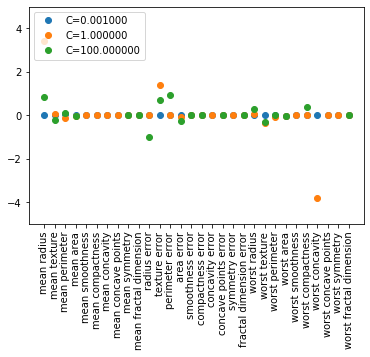

In [49]:
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
         % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"
         % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(-5, 5)
plt.legend(loc=2)

### Linear Model for multiclss classification

多くの線形分類モデルはバイナリモデルであり、自然にマルチクラスのケースに拡張されません（ロジスティック回帰を除く）。  
バイナリ分類アルゴリズムをマルチクラス分類アルゴリズムに拡張する一般的な手法は、one-vs-restアプローチです。  
one-vs-restアプローチでは、クラスごとにバイナリモデルが学習され、他のすべてのクラスからこのクラスを分離しようとするため、クラスの数と同じ数のバイナリモデルが生成されます。  

予測を行うために、すべてのバイナリ分類器はテストポイントで実行されます。単一のクラスで最も高いスコアを持つ分類子が「勝ち」、このクラスラベルが予測として返されます。  

クラスごとに1つのバイナリ分類器を使用すると、クラスごとに1つの係数ベクトル$ w $と1つの切片$ b $が作成されます。  
式の結果  

\begin{align*}
&w[0]x[0]+w[1]x[1]+\dotsc + w[p]*x[p]+b&\text{ (3) classification confidence}
\end{align*}

は、割り当てられたクラスラベルが最高です。  

ロジスティック回帰の背後にある数学はone-vsrestアプローチとは多少異なりますが、クラスごとに1つの係数ベクトルと切片が生成され、予測を作成する同じ方法が適用されます。  

one-vs-restメソッドを単純な3クラスの分類データセットに適用してみましょう。  
2次元のデータセットを使用します。各クラスは、ガウス分布からサンプリングされたデータによって与えられます。

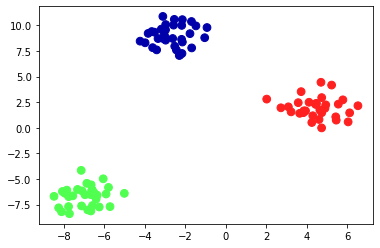

In [50]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)

次に、データセットでLinearSVC分類器をトレーニングします。

In [51]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


coef_の形状は（3、2）であることがわかります。これは、coef_の各行に3つのクラスのうちの1つの係数ベクトルが含まれていることを意味します。  
各行には2つのエントリがあり、データセットの2つの特徴に対応しています。  

intercept_は1次元配列になり、各クラスのインターセプトを格納します。  
3つのバイナリ分類子によって与えられた線を視覚化してみましょう：

(-10, 8)

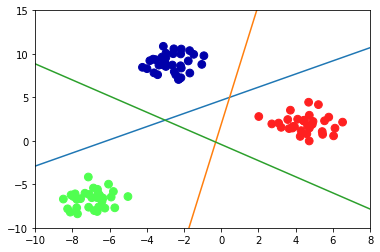

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

赤い線は、赤いクラスのバイナリ分類器の決定境界を示しています。  

トレーニングデータのすべての赤い点が赤い線の下にあることがわかります。  
これは、これらがこのバイナリ分類器の「赤い」側にあることを意味します。  
赤い点は緑の線の左側にあります。つまり、緑のクラスのバイナリ分類器によって「残り」として分類されます。  
赤い点は青い線の下にあります。  
これは、青いクラスのバイナリ分類器もそれらを「残り」として分類することを意味します。  
したがって、この領域の任意のポイントは、最終的な分類子によって赤として分類されます（赤の分類子の式（3）はゼロより大きく、他の2つのクラスではゼロより小さい）。  

しかし、プロットの真ん中にある三角形はどうですか？ 3つのバイナリ分類子はすべて、そこでポイントを「休憩」として分類します。  
ポイントはどのクラスに割り当てられますか？答えは、式（3）で最も高い値を持つもの、つまり最も近いラインのクラスです。  

次の図は、2Dスペースのすべての領域に対して表示される予測を示しています。

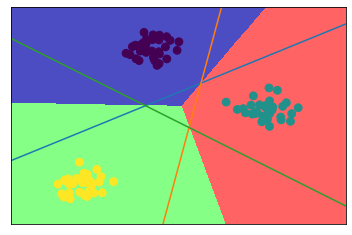

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

### Strength, weaknessees and paremeters

線形モデルの主なパラメーターは、回帰モデルではalpha、LinearSVCおよびLogisticRegressionではCと呼ばれる正則化パラメーターです。  
大きなアルファまたは小さなCは単純なモデルを意味します。  
特に回帰モデルの場合、このパラメーターの調整は非常に重要です。通常、Cとalphaは対数スケールで検索されます。  

L1正則化を使用するか、L2正則化を使用するかは、他に決定する必要があります。  
一部の機能のみが実際に重要であると想定する場合は、L1を使用する必要があります。  
それ以外の場合は、デフォルトでL2にする必要があります。  

L1は、モデルの解釈可能性が重要な場合にも役立ちます。   
L1はいくつかの機能のみを使用するため、モデルにとって重要な機能と、これらの機能の効果を簡単に説明できます。  

線形モデルはトレーニングが非常に速く、予測も高速です。  
それらは非常に大きなデータセットにスケーリングし、スパースデータでうまく機能します。  
データが数百または数百のサンプルで構成されている場合は、SGDClassifierおよびSGDRegressorを調査することをお勧めします。  
これらは、上記の線形モデルのさらにスケーラブルなバージョンを実装しています。

- ［「スパース 」（sparse） とは、「すかすか」という意味だ。 「全体のデータは大規模だが、意味のある情報はごく一部しかない」というようなものが、スパース構造を持つデータだ。 実際のデータには、こうしたものが多い。］

線形モデルのもう1つの強みは、回帰式に式（1）を使用し、クラス線形モデルに式（2）を使用して、予測がどのように行われるかを比較的簡単に理解できることです。  
残念ながら、なぜ係数が現状通りであるのかは、しばしば完全には明らかにされていません。  
これは、データセットに相関性の高い特徴がある場合に特に当てはまります。  
これらの場合、係数の解釈が難しい場合があります。  

線形モデルは、特徴の数がサンプルの数と比較して多い場合によく機能します。  
また、他のモデルをトレーニングできないため、非常に大きなデータセットで使用されることもよくあります。  
ただし、小さいデータセットでは、他のモデルの方が一般化のパフォーマンスが向上する可能性があります。

## Naive Bayes Classifiers(単純ベイズ分類器)

単純ベイズ分類器は、上記で説明した線形モデルに非常に類似した分類器のファミリーです。  
ただし、トレーニングはさらに速くなる傾向があります。  
この効率の代償として、単純ベイズモデルは、一般化性能がLogisticRegressionやLinearSVCなどの線形分類器よりもわずかに劣ることが多いです。  

単純ベイズモデルが非常に効率的である理由は、各特徴を個別に見てパラメーターを学習し、各特徴から単純なクラスごとの統計を収集するためです。  

scikit-learnには、3種類の単純ベイズ分類器が実装されています。 GaussianNB, BernoulliNB and MultinomialNB

GaussianNBは任意の連続データに適用できますが、BernoulliNBはバイナリデータを想定し、MultinomialNBはカウントデータを想定します（つまり、各機能は、文章に単語が出現する頻度などの整数カウントを表します）。  
BernoulliNBとMultinomialNBは主にテキストデータの分類に使用されます。これらについては、第7章（テキストデータ）で再度取り上げます。  

BernoulliNB分類器は、各クラスのすべての特徴がゼロでない頻度をカウントします。これは例で最も簡単に理解できます。

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

ここでは、4つのデータポイントがあり、それぞれに4つのバイナリフィーチャがあります。  
2つのクラス、0と1があります。  

クラス0（最初と3番目のデータポイント）の場合、最初の特徴はゼロの2回で非ゼロの0回、2番目の特徴はゼロの1回とゼロ以外の1回です。  

次に、これらと同じ数が2番目のクラスのデータポイントに対して計算されます。  

本質的に、クラスごとにゼロ以外のエントリをカウントすると、次のようになります。

In [55]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print(counts)

# np.unique(y) -> で [0,1]が返る、つまりlabel=0とlabel=1の2回ループ
# 一度目のループ
# X[y == 0] -> で y == 0 である(↓列方向)のは、1行目と3行目が取り出される
# [[0 1 0 1]
#  [0 0 0 0]] -> sum(axis=0)で↓列ごとに累計 -> [0 1 0 2] となる
# 二度目のループ
# X[y == 1] -> で y == 1 である(↓列方向)のは、2行目と4行目が取り出される
# [[1 0 1 1]
#  [1 0 1 0]] -> sum(axis=0)で↓列ごとに累計 -> [2 0 2 1] となる

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


他の2つの素朴なベイズモデル、MultinomialNBとGaussianNBは、計算する統計の種類が少し異なります。  
MultinomialNBは各クラスの各機能の平均値を考慮に入れ、GaussianNBは各クラスの各機能の平均値と標準偏差を保存します。  

予測を行うには、データポイントを各クラスの統計と比較し、最もよく一致するクラスを予測します。  
興味深いことに、MultinomialNBおよびBernoulliNBの場合、これは線形モデルと同じ形式の予測式になります（式（2））。  
残念ながら、ナイーブベイズモデルのcoef_の意味は、線形モデルの場合とは少し異なります。その点で、coef_はwと同じではありません。

### Storengths,weaknesses and parameters

MultinomialNBとBernoulliNBには、モデルの複雑さを制御する単一のパラメーターalphaがあります。  alphaが機能する方法は、アルゴリズムがalphaに多くの仮想データポイントをデータに追加することです。 
それらはすべての特徴に対して正の値を持っています。  
これにより、統計の「平滑化」が行われます。  
大きなアルファはより平滑化することを意味し、結果としてモデルの複雑さが減少します。  
アルゴリズムのパフォーマンスは、alphaの設定に対して比較的堅牢です。  
つまり、alphaを設定することは、優れたパフォーマンスにとって重要ではありません。  
ただし、チューニングすると、通常、精度が多少向上します。  

GaussianNBモデルは実務家にはほとんど使用されないようですが、Naive Bayesの他の2つのバリアント
は、テキストなどのスパースカウントデータに広く使用されています。  
MultinomialNBは通常、特にBinaryNBよりもパフォーマンスが高く、特に、ゼロ以外の特徴が比較的多数あるデータセット（つまり、大きなドキュメント）で効果的です。  

Naive Bayesモデルは、線形モデルの長所と短所の多くを共有しています。  
彼らは訓練(train)と予測(predict)が非常に速く、訓練手順は理解しやすいです。  
モデルは高次元のスパースデータで非常にうまく機能し、パラメーターに対して比較的堅牢です。  
Naive Bayesモデルは優れたベースラインモデルであり、線形モデルでさえトレーニングに時間がかかりすぎる可能性がある非常に大規模なデータセットでよく使用されます。

## Dcision trees(決定木)

決定木は、分類および回帰タスクで広く使用されているモデルです。基本的に、彼らは「if-else」の質問の階層を学び、決定につながります。  

これらの質問は、20問のゲームで出題される質問に似ています。  

クマ、タカ、ペンギン、イルカの4つの動物を区別したいとします。  

あなたの目標は、正しい答えを得ることです。b）if-elseの質問をできるだけ少なくします。  

最初に、動物に羽があるかどうか、つまり、可能な動物を2匹に絞る質問をすることから始めます。  

答えが「はい」の場合、タカとペンギンを区別するのに役立つ別の質問をすることができます。たとえば、動物が飛ぶことができるかどうかを尋ねることができます。動物に羽がない場合、選択できる動物はイルカとクマです。たとえば、動物にヒレがあるかどうかなど、これら2つの動物を区別するための質問をする必要があります。  

この一連の質問は、図animal_treeに示すように、決定木として表すことができます。  

この図では、ツリーの各ノードは質問、または回答を含むターミナルノード（リーフとも呼ばれます）を表します。エッジは、質問への回答と次に尋ねる質問とを結び付けます。

Text(0.5, 0.98, 'animal_tree')

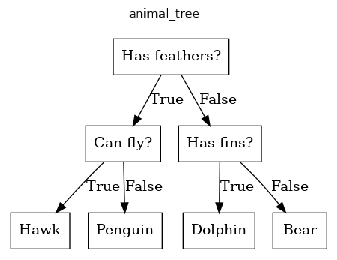

In [56]:
# no module error graphviz
# conda intall -c -t conda-forge python-graphviz
# linux本体にも入れないと文字化けする
# sudp spt-get install graphviz
mglearn.plots.plot_animal_tree()
plt.suptitle("animal_tree")

機械学習の用語では、「羽を持つ」、「飛べる」、「ひれを持つ」という3つの機能を使用して、4つのクラスの動物（タカ、ペンギン、イルカ、クマ）を区別するモデルを構築しました。これらのモデルを手動で構築する代わりに、教師あり学習を使用してデータからモデルを学習できます。

### Building Decision Trees

図tree_buildingの上部に示されている2D分類データセットの決定木を構築するプロセスを見てみましょう。  
データセットは、青と赤の点の2つの半月形で構成され、それぞれ75個のデータ点で構成されています。  
このデータセットをtwo_moonsと呼びます。

Text(0.5, 0.98, 'tree_building')

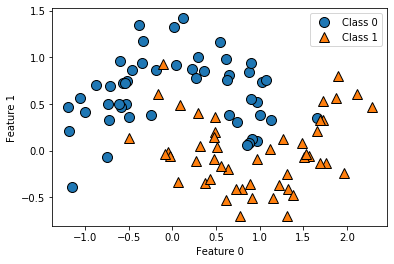

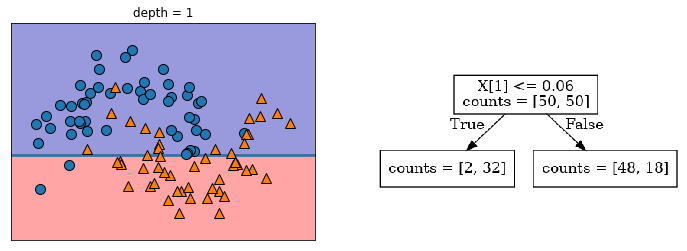

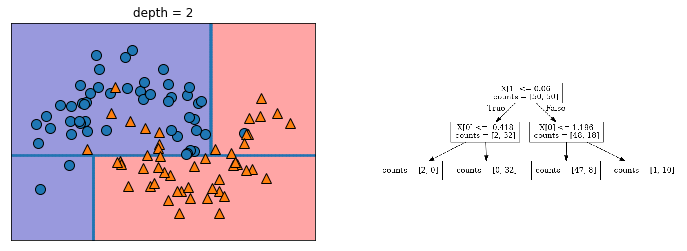

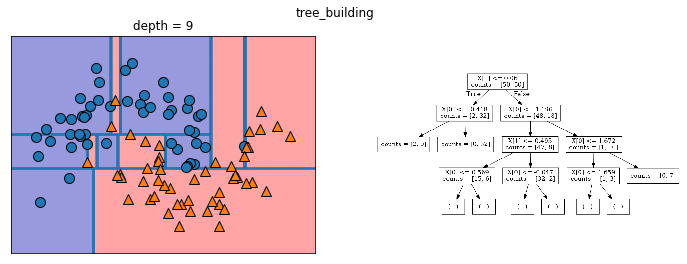

In [57]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree_building")

ディシジョンツリーを学習するということは、真の答えにすばやく到達できる一連のif / else質問を学習することを意味します。  

機械学習の設定では、これらの質問はテストと呼ばれます（テストセットと混同しないでください。  
テストセットは、モデルの一般化可能性を確認するためにテストに使用するデータです）。  

通常、データは動物の例のようにバイナリのはい/いいえ機能の形式ではなく、図に示す2Dデータセットなどの連続した機能として表されます。  

連続データで使用されるテストは、「機能iが値aより大きい」からのものです。  

ツリーを構築するために、アルゴリズムは可能なすべてのテストを検索し、ターゲット変数について最も情報が得られるものを見つけます。  

図tree_buildingの2行目は、選択された最初のテストを示しています。  
データセットをx[1]= 0.2372で垂直に分割すると、ほとんどの情報が得られます。  
青い点を赤い点から分離するのが最適です。  
ルートとも呼ばれる一番上のノードは、75個の赤と75個の青の点で構成されるデータセット全体を表します。  
分割は、黒い線で示されるx[1]<= 0.2372かどうかをテストすることによって行われます。  
テストが真の場合、左側のノードにポイントが割り当てられます。  
これには、8つの青いポイントと58つの赤いポイントが含まれています。  
それ以外の場合、ポイントは右側のノードに割り当てられます。  
これには、67の赤いポイントと17の青いポイントが含まれています。  
これら2つのノードは、図tree_buildingに示されている上部と下部の領域に対応しています。  

最初の分割では青と赤の点をうまく分離できましたが、下の領域にはまだ青の点が含まれており、上の領域にはまだ赤の点が含まれています。  

両方の地域で最良のテストを探すプロセスを繰り返すことにより、より正確なモデルを構築できます。  

図tree_buildingは、左側と右側の領域の最も有益な次の分割がx[0]に基づいていることを示しています。  

この再帰的なプロセスにより、各ノードにテストが含まれる、決定のバイナリツリーが生成されます。  

あるいは、各テストを、現在考慮されているデータの一部を1つの軸に沿って分割することと考えることもできます。  
これにより、アルゴリズムを階層パーティションを構築していると見なすことができます。  
各テストは1つの特徴のみに関係するため、結果のパーティションの領域には常に軸に平行な境界があります。  

図tree_buildingは、左側の列にデータのパーティションを示し、右側の列に結果のツリーを示します。  

データの再帰的分割は通常、パーティション内の各領域（決定ツリーの各リーフ）に単一のターゲット値（単一クラスの決定ツリーまたは単一の回帰値）のみが含まれるまで繰り返されます。  
ターゲット値を1つだけ含むツリーの葉は、pureと呼ばれます。  

新しいデータポイントの予測は、特徴空間のパーティションのどの領域にポイントが存在するかを確認し、その領域の大多数のターゲット（純粋な葉の場合は単一のターゲット）を予測することによって行われます。  
領域は、テストが実行されたかどうかに応じて、ルートからツリーをトラバースし、左または右に移動することで見つけることができます。

[]

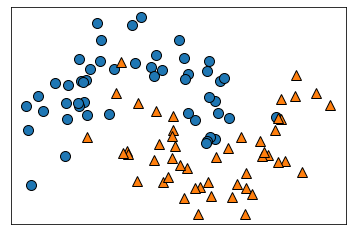

In [58]:
from sklearn.datasets import make_moons
from mglearn.tools import discrete_scatter
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)  # データポイントの数，バラつきを指定
plt.figure()  # 何も描画されていない新たなウインドウを表示
ax = plt.gca()
discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.set_xticks(())  # x軸のメモリを非表示
ax.set_yticks(())  # y軸のメモリを非表示

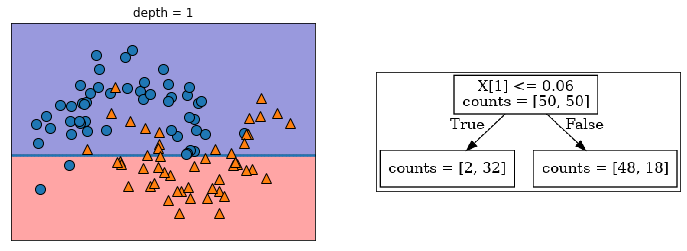

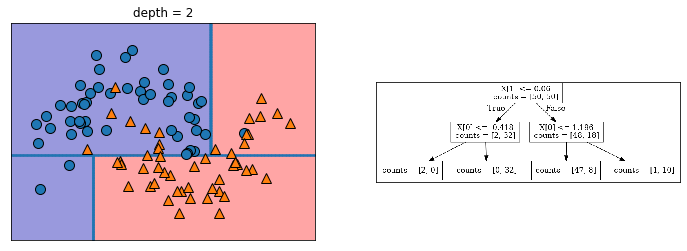

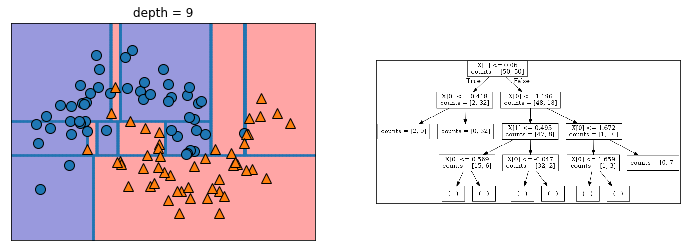

In [59]:
for i, max_depth in enumerate([1, 2, 9]):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'xticks': (), 'yticks': ()})
    tree = mglearn.plot_interactive_tree.plot_tree(X, y, max_depth, ax=ax[0])
    ax[1].imshow(mglearn.plot_interactive_tree.tree_image(tree))
    plt.show()
    plt.close()

### Controllong complexity of Decision Trees(決定木の複雑さの制御)

通常、上記のようにツリーを構築し、すべての葉がpureになるまで続けると、モデルが非常に複雑になり、トレーニングデータに非常に適合します。  
pure leavesの存在は、ツリーがトレーニングセットで100％正確であることを意味します。  
トレーニングセットの各データポイントは、正しいマジョリティクラスを持つリーフにあります。  
下の列の図tree_buildingの左側に、過剰適合が見られます。  
すべての青い点の真ん中に、赤いと判断された領域が表示されます。  
一方、右端の1つの青い点の周りには、小さな青色の帯があります。  
これは、決定境界がどのように見えるかを想像する方法ではありません。  
決定境界は、そのクラスの他の点から遠く離れている単一の外れ値の点に多く焦点を当てています。  

過剰適合を防ぐための2つの一般的な戦略があります：  
pre-pruningとも呼ばれるツリーの作成を早期に停止するか、ツリーを構築してから、情報をほとんど含まないノードを削除または折りたたみます（post-pruningまたは単にpruningとも呼ばれます）。  
pre-pruningの可能な基準には、ツリーのmaximun depth(最大深度)の制限、リーフのmaximum number(最大数)の制限、またはノードを分割し続けるためにノード内のポイントのminimum number(最小数)を要求することが含まれます。  

scikit-learnのDecision tree(決定木)は、DecisionTreeRegressorクラスとDecisionTreeClassifierクラスに実装されています。　　
Scikit-learnはpre-pruningのみを実装し、post-pruningは実装していません。  

pre-pruning(事前剪定)が乳がんデータセットに及ぼす影響をさらに詳しく見てみましょう。  

いつものように、データセットをインポートして、トレーニングとテストの部分に分割します  

次に、ツリーを完全に開発するというデフォルト設定を使用してモデルを構築します（すべてのleaves(葉)がpureになるまでツリーを成長させます）。  
ツリー内のrandom_stateを修正します。  
これは内部的にタイブレイクに使用されます

In [60]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # 42で同じ物
tree = DecisionTreeClassifier(random_state=0) # 0で新たに作る
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accrracy on tesr set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accrracy on tesr set: 0.937063


予想どおり、leaves(葉)がpureであるため、トレーニングセットの精度は100％です。　　

テストセットの精度は、約95％の精度であった上記の線形モデルよりもわずかに劣ります。  

次に、pre-pruning(事前剪定)をツリーに適用します。これにより、トレーニングデータに完全に適合する前にツリーの開発が停止します。  

考えられる1つの方法は、特定の深さに達した後にツリーの構築を停止することです。  
ここでは、max_depth = 4を設定しています。つまり、4つの連続した質問のみを尋ねることができます（図tree_buildingを参照）。  

In [61]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


ツリーのdepth(深さ)を制限すると、overfiting(過剰適合)が減少します。これにより、トレーニングセットのaccuracy(精度)は低くなりますが、テストセットは改善されます。

### Analyzing Decision Trees(決定木の分析)

ツリーモジュールのexport_graphviz関数を使用してツリーを視覚化できます。  

これは、グラフを保存するためのテキストファイル形式であるdotファイル形式でファイルを書き込みます。  

各ノードの過半数のクラスを反映するようにノードに色を付けるオプションを設定し、ツリーに適切にラベルを付けることができるようにクラスと機能の名前を渡します。

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["malignat", "begin"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

このファイルを読み取り、graphvizモジュールを使用して視覚化できます（またはdotファイルを読み取ることができる任意のプログラムを使用できます）。

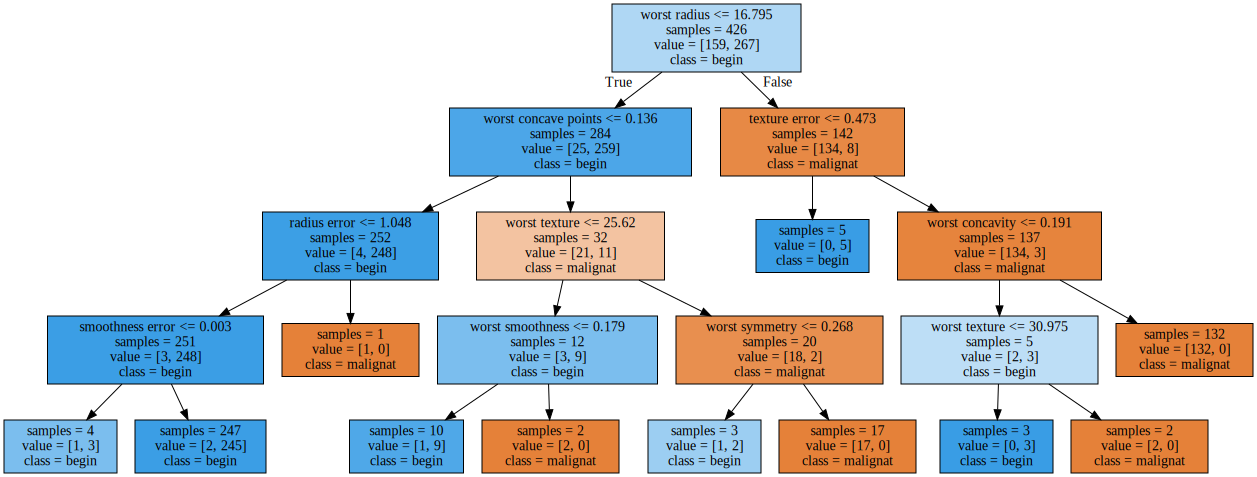

In [63]:
import graphviz

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ツリーの視覚化は、アルゴリズムがどのように予測を行うかについての詳細なビューを提供し、専門家以外に簡単に説明される機械学習アルゴリズムの良い例です。  
ただし、ここに示すように、depth(深さ)が4のツリーであっても、少し圧倒される可能性があります。  
deeper trees(深い木)（depth 10は珍しいことではありません）は、さらに把握することが困難です。  

役立つと思われるツリーを検査する1つの方法は、ほとんどのデータが実際にたどるパスを見つけることです。  

図の各ノードに示されているn_samplesは各ノードのサンプル数を示し、値はクラスごとのサンプル数を示します。  

右側のブランチをたどると、texture_error <= 0.4732は、8つの良性サンプルだけで134の悪性サンプルのみを含むノードを作成することがわかります。  
ツリーのこの側の残りの部分は、いくつかのより細かい区別を使用して、残りの8つの良性サンプルを分割します。  
最初のスプリットで右に移動した142個のサンプルのうち、ほぼすべて（132個）が一番右の葉に移動します。  

ルートで左に取ると、texture_error> 0.4732の場合、25の悪性サンプルと259の良性サンプルになります。  
ほぼすべての良性サンプルは右から2番目のリーフになり、他のほとんどのリーフ(葉)にはごく少数のサンプルしか含まれていません。

### Feature Importance in trees

負担になる可能性があるツリー全体を見る代わりに、ツリーの動作を要約するために導出できるプロパティを導出できるいくつかの有用な統計があります。  
最も一般的に使用される要約は機能の重要性です。  
これは、ツリーが行う決定に対して各機能がどれほど重要かを評価します。  
これは、機能ごとに0〜1の数値です。0は「まったく使用されない」ことを意味し、1は「ターゲットを完全に予測する」ことを意味します。  

機能の重要度は常に1になります。

In [64]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

線形モデルの係数を視覚化するのと同様の方法で、機能の重要性を視覚化できます。

(0, 1)

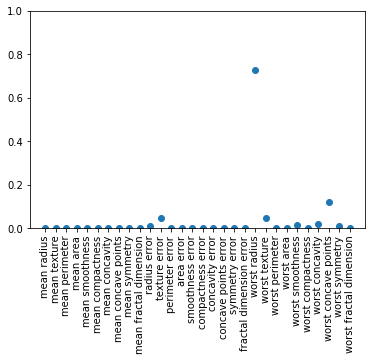

In [65]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(0, 1)

ここでは、一番上の分割（「worst radius」）で使用されるフィーチャーが、最も重要なフィーチャーであることがわかります。  
これにより、ツリーを分析する際の観察結果が確認されました。  
最初のレベルでは、2つのクラスがすでにかなりよく分離されています。  

ただし、機能のfeature_importanceが低い場合でも、この機能が有益ではないという意味ではありません。  
これは、この機能がツリーによって選択されなかったことを意味するだけです。  
おそらく、別の機能が同じ情報をエンコードしているためです。  

線形モデルの係数とは対照的に、特徴の重要性は常に肯定的であり、特徴が示すクラスをエンコードしません。  
機能の重要性は、「worst radius」が重要であることを示していますが、高い半径がサンプルが「良性」または「悪性」であることを示しているかどうかはわかりません。  
実際、以下の例でわかるように、機能とクラスの間に単純な関係はないかもしれません。

Feature importances: [0. 1.]


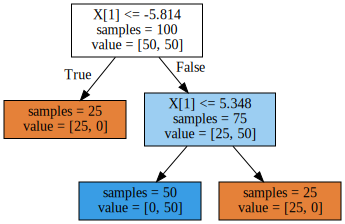

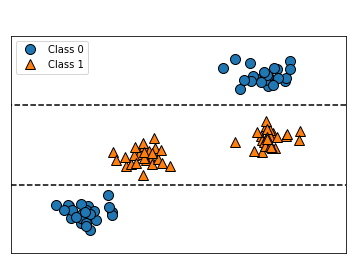

In [66]:

tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone", color='w')

tree

プロットは、2つの特徴と2つのクラスを持つデータセットを示しています。  
ここでは、すべての情報がX[1]に含まれ、X[0]はまったく使用されません。  
しかし、X[1]と出力クラスの関係は単調ではないため、「X[0]の高い値はクラス赤を意味し、低い値はクラス青を意味する」などとは逆に言えません。  

ここでは、分類(classification)のためのdecision tree(決定木)に焦点を当てていますが、Decision TreeRegressorで実装されている回帰の決定木についても同様です。  
回帰ツリーの使用法と分析はどちらも分類ツリーと非常に似ているため、ここではこれ以上詳しく説明しません。 

### Strengths,weakness and prameters(強み、弱みそしてパラメータ)

上記のように、決定木のモデルの複雑さを制御するパラメーターは、完全に開発される前にツリーの構築を停止するpre-pruning(事前剪定)パラメーターです。通常、pre-pruning strategies(事前剪定戦略)の1つを選択し、min_depth、max_leaf_nodes、またはmin_samples_leafを設定することで、overfitting(過剰適合)を防止します。  

ディシジョンツリーには、これまでに説明した多くのアルゴリズムに比べて2つの利点があります。  
結果のモデルは、専門家以外でも（少なくとも小さなツリーでは）簡単に視覚化および理解でき、アルゴリズムはデータのスケーリングに対して完全に不変です。  
特徴は個別に処理され、データの可能な分割はスケーリングに依存しません。decision tree(決定木)アルゴリズムでは、特徴のnormalization(正規化)やstandaraization(標準化)などの前処理は必要ありません。  

特に、ディシジョンツリーは、完全に異なるスケールの機能、またはバイナリ機能と連続機能の混合がある場合にうまく機能します。  

decision trees(決定木)の主な欠点は、pre-pruning(事前剪定)を使用した場合でも、decision tree(決定木)がoverfitting(過剰適合)し、一般化のパフォーマンスが低下する傾向があることです。  
したがって、ほとんどのアプリケーションでは、以下で説明するアンサンブル法は、通常、single decision tree(単一の決定木)の代わりに使用されます。  

## Ensembles of Decision Trees(決定木のアンサンブル)

アンサンブルは、複数の機械学習モデルを組み合わせて、より強力なモデルを作成するメソッドです。　　

機械学習の文献には、このカテゴリに属する多くのモデルがありますが、分類と回帰の幅広いデータセットで効果的であることが証明されている2つのアンサンブルモデルがあり、どちらも決定木をビルディングブロックとして使用しています：Random Forests(ランダムフォレスト)とGradient Boosed Decision Tree(勾配ブースト決定木。  

### Random Forests

上記で観察されたように、決定木の主な欠点は、それらが訓練データをオーバーフィットする傾向があることです。  

ランダムフォレストは、この問題に対処する1つの方法です。  
ランダムフォレストは、基本的にdecision trees(決定ツリー)のコレクションであり、各ツリーは他のツリーとは少し異なります。  
ランダムフォレストの考え方は、各ツリーは比較的良い予測を行う可能性がありますが、データの一部にオーバーフィットする可能性が高いということです。  

多くのツリーを構築し、それらすべてが適切に機能し、さまざまな方法でオーバーフィットする場合、それらの結果を平均することでオーバーフィットの量を減らすことができます。  
このoverfitting(過剰適合)の減少は、木の予測力を維持しながら、厳密な数学を使用して示すことができます。  

この戦略を実装するには、多くの意思決定ツリーを構築する必要があります。  
各ツリーは、ターゲットを予測するための許容できるジョブを実行する必要があり、他のツリーとは異なる必要もあります。  
ランダムフォレストは、ツリー構築にランダム性を注入することで名前が付けられ、各ツリーが確実に異なるようにします。ランダムにツリーを作成する方法は2つあります。  
フォレストはランダム化されています。:  
ツリーの構築に使用されるデータポイントを選択し、各スプリットテストで機能を選択します。  
このプロセスについて詳しく見ていきましょう。

#### Building Random Forests

ランダムフォレストモデルを構築するには、構築するツリーの数を決定する必要があります  （RandomForestRegressorまたはRandomForestClassifierのn_estimatorパラメーター）。  
10本のツリーを作りたいとしましょう。  
これらのツリーは互いに完全に独立して構築され、それらが区別されるように［選択しますか？］ランダムに選択します［木はランダムに選択しますか？］。  

ツリーを構築するには、まずデータのbootstrapサンプルと呼ばれるものを取ります。  
bootstrapサンプルとは、n_samplesデータポイントからランダムに置換（つまり、同じサンプルを複数回選択できる）した例をn_sam ples回繰り返し描画することです。  
これにより、元のデータセットと同じ大きさのデータセットが作成されますが、一部のデータポイントはそこから失われ、一部は繰り返されます。  

説明のために、リスト['a'、 'b'、 'c'、 'd']のブートストラップサンプルを作成するとします。  
可能なブートストラップサンプルは['b'、 'd'、 'd'、 'c']です。  
別の可能なサンプルは['d'、 'a'、 'd'、 'a']です。  

次に、この新しく作成されたデータセットに基づいてdecision tree(決定木)が構築されます。  
ただし、decisiontree(決定木)について説明したアルゴリズムは少し変更されています。  
各nodes(ノード)に最適なテストを探す代わりに、アルゴリズムは各nodes(ノード)で機能のサブセットをランダムに選択し、これらの機能の1つを含む可能な限り最高のテストを探します。  
選択される機能の量は、max_featuresパラメーターによって制御されます。  

機能のサブセットのこの選択は各ノードで個別に繰り返されるため、ツリーの各ノードは、機能の異なるサブセットを使用して決定を行うことができます。  

ブートストラップサンプリングにより、ランダムフォレスト内の各決定木がわずかに異なるデータセットに構築されます。  
各ノードで機能を選択するため、各ツリーの各分割は、機能の異なるサブセットで動作します。  
これら2つのメカニズムにより、ランダムフォレスト内のすべての木が異なることが保証されます。  

このプロセスの重要なパラメーターはmax_featuresです。  
max_featuresをn_featuresに設定すると、各分割はデータセット内のすべての特徴を見ることができ、ランダム性は注入されません。  
max_featuresを1に設定すると、スプリットはテストする機能をまったく選択できず、ランダムに選択された機能の異なるしきい値のみを検索できることを意味します。  

したがって、max_featuresが高いということは、ランダムフォレスト内のツリーが非常に似ていることを意味し、最も特徴的な機能を使用してデータを簡単に適合させることができます。  
max_featuresが低いということは、ランダムフォレスト内のツリーがまったく異なり、データを適切にフィットさせるために各ツリーを非常に深くする必要がある場合があることを意味します。  

ランダムフォレストを使用して予測を行うために、アルゴリズムはまずフォレスト内のすべてのツリーに対して予測を行います。  
回帰の場合、これらの結果を平均して最終的な予測を取得できます。  
分類には、「soft voting」戦略が使用されます。  
これは、各アルゴリズムが「ソフトな」予測を行い、可能な各出力ラベルの確率を提供することを意味します。すべてのツリーで予測される確率が平均化され、最高のラベルを持つクラスが予測されます。　　

#### Analyzing Randam Forests

上記で調査したtwo_moonデータに、5本の木からなるランダムフォレストを適用してみましょう。  

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                     oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

random forest(ランダムフォレスト)の一部として構築されたツリーは、estimator_属性に格納されます。  
各ツリーによって学習されたdecision boundaries(決定境界)を、フォレストによって行われたそれらのaggregate prediction(集計予測)とともに視覚化してみましょう。  

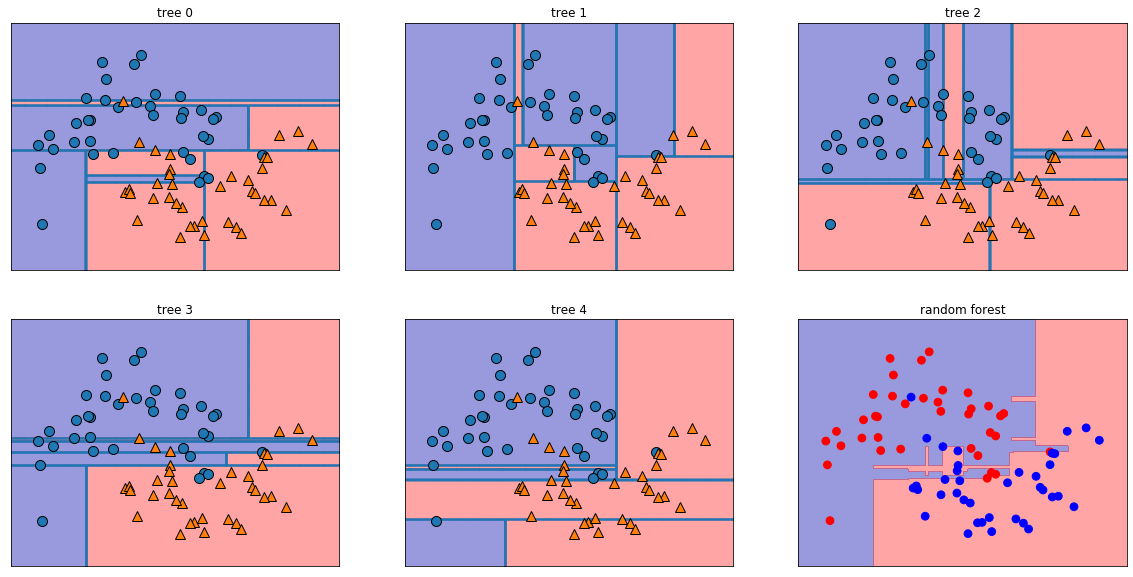

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

5つのツリーによって学習された決定がまったく異なることがはっきりとわかります。ここでプロットされているトレーニングポイントの一部は、ブートストラップサンプリングのために実際にはツリーのトレーニングセットに含まれていなかったため、それぞれに誤りがあります。  

ランダムフォレストは個々のどのツリーよりも適合が少なく、はるかに直感的な決定の境界を提供します。  
実際のアプリケーションでは、さらに多くのツリー（多くの場合、数百または数千）を使用して、境界をさらに滑らかにします。  
乳がんデータセットに100本の木で構成されるランダムなフォレストを適用してみましょう。

In [69]:

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("sccuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 1.000000
sccuracy on test set: 0.972028


ランダムフォレストの精度は97％で、パラメーターを調整することなく、線形モデルや単一の決定木よりも優れています。 max_features設定を調整したり、単一の決定木と同じようにpre-pruning(事前剪定)を適用したりできます。  

ただし、多くの場合、ランダムフォレストの既定のパラメーターは既に十分に機能しています。  

決定木と同様に、ランダムフォレストは機能の重要度を提供します。機能の重要度は、フォレスト内のツリー全体の機能の重要度を集計することによって計算されます。  
通常、ランダムフォレストによって提供される機能の重要度は、単一のツリーによって提供されるものよりも信頼性が高くなります。

([<matplotlib.axis.XTick at 0x7fa5436f1250>,
 <a list of 30 Text xticklabel objects>)

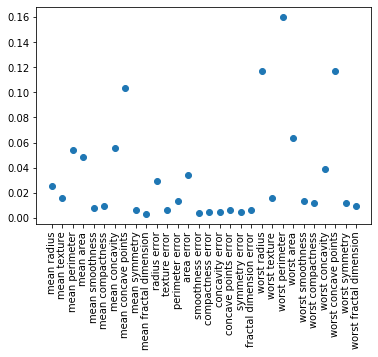

In [70]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

ご覧のように、ランダムフォレストは、単一のツリーよりも多くの機能にゼロ以外の重要度を与えます。  
単一の決定木と同様に、ランダムフォレストも「worst radius」に多くの重要度を与えますが、実際には「worst preimeter」が全体的に最も有益な機能になる。  
ランダムフォレストを構築する際のランダム性により、アルゴリズムは多くの考えられる説明を検討する必要があり、その結果、ランダムフォレストは単一のツリーよりもはるかに広い範囲のデータをキャプチャします。

#### Strengths, weakness and parameters

回帰と分類のためのランダムフォレストは、現在最も広く使用されている機械学習手法の1つです。  

これらは非常に強力であり、多くの場合、パラメータを大幅に調整することなく適切に機能し、データのスケーリングを必要としません。  

基本的に、ランダムフォレストはdecision trees(決定木)のすべての利点を共有すると同時に、それらの欠点の一部を補います。  

それでも意思決定ツリーを使用する1つの理由は、意思決定プロセスのコンパクトな表現が必要な場合です。  数十または数百の木を詳細に解釈することは基本的に不可能であり、ランダムフォレスト内のツリーは決定ツリーよりも深い傾向があります（機能サブセットを使用しているため）。  
したがって、専門家ではない人に視覚的な方法で予測の作成を要約する必要がある場合は、単一の決定木がより適切な選択になる可能性があります。  

大規模なデータセットでランダムフォレストを構築するのは時間がかかる場合がありますが、コンピューター内の複数のCPUコア間で簡単に並列化できます。  
マルチコアプロセッサを使用している場合（最近のほとんどすべてのコンピューターと同じように）、n_jobsパラメーターを使用して、使用するコアの数を調整できます。  
より多くのCPUコアを使用すると、線形速度が向上します（2つのコアを使用すると、ランダムフォレストのトレーニングは2倍速くなります）が、コアの数より大きいn_jobsを指定しても効果がありません。 n_jobs = -1を設定して、コンピューターのすべてのコアを使用できます。  

ランダムフォレストはその性質上ランダムであり、異なるランダム状態を設定する（またはrandom_stateをまったく設定しない）と、構築されるモデルが大幅に変更される可能性があることに注意してください。  
フォレスト内のツリーが多いほど、ランダムな状態の選択に対してより堅牢になります。  
再現可能な結果を得たい場合は、random_stateを修正することが重要です。  

ランダムフォレストは、テキストデータなどの非常に高次元のスパースデータ(sparse data)ではうまく機能しない傾向があります。  
この種のデータについては、線形モデルの方が適切な場合があります。  

ランダムフォレストは通常、非常に大きなデータセットでもうまく機能し、強力なコンピューター内の多くのCPUコアでトレーニングを簡単に並列化できます。  
ただし、ランダムフォレストはより多くのメモリを必要とし、線形モデルよりもトレーニングと予測に時間がかかります。  
アプリケーションで時間とメモリが重要な場合は、代わりに線形モデルを使用することは理にかなっています。  

調整する重要なパラメーターは、n_estimators、max_features、およびおそらくmax_depthのようなpre-pruning(事前剪定)オプションです。  
n_estimatorsの場合、大きいほど常に優れています。   
より多くのツリーを平均化すると、より堅牢な集団が生成されます。  
ただし、収益は減少し、ツリーが増えると、トレーニングに多くのメモリと時間が必要になります。  
一般的な経験則は、「時間/メモリに応じてできるだけ多く」を構築することです。  

上記のように、max_featuresは各ツリーのランダム度を決定し、max_featuresが小さいほど過剰適合を低減します。  
デフォルト値と適切な経験則は、分類の場合は max_features=sqrt(n_features)、回帰の場合は max_features=log2(n_fea tures)です。  

max_featuresまたはmax_leaf_nodesを追加すると、パフォーマンスが向上する場合があります。  
また、トレーニングと予測に必要なスペースと時間を大幅に削減できます。

### Gradient Boosted Regiression Tree(Gradtent Boosting Machines)(勾配ブースト回帰ツリー(勾配ブースティングマシン))

Gradient Boosted Regression Tree(勾配ブースト回帰ツリー)は、複数の決定木をより強力なモデルに組み合わせる別のアンサンブル法です。  
名前の「回帰」にもかかわらず、これらのモデルは回帰と分類に使用できます。  

ランダムフォレストとは対照的に、勾配ブースティングは、各ツリーが前のツリーの誤りを修正しようとする連続的な方法でツリーを構築することによって機能します。  
Gradient Boosted Regression Tree(勾配ブースト回帰ツリー)にはランダム化はありません。  
代わりに、強力なpre-pruning(事前剪定)が使用されます。  
Gradient Boosted trees(勾配ブーストツリー)では、depth(深さ)が1〜5の非常に浅いツリーを使用することが多く、モデルのメモリが小さくなり、予測が速くなります。  

勾配ブースティングの背後にある主なアイデアは、浅い木のような多くの単純なモデル（この場合、weak learn(弱学習器)と呼ばれます）を組み合わせることです。  
各ツリーはデータの一部について適切な予測しか提供できないため、反復的にパフォーマンスを向上させるために、より多くのツリーが追加されています。  

Gradient Boosted treesは、機械学習のコンテストでしばしば勝利を収め、業界で広く使用されています。  
これらは一般に、ランダムフォレストよりもパラメータ設定に少し敏感ですが、パラメータが正しく設定されている場合は、精度が向上します。  

アンサンブル内の事前剪定およびツリーの数とは別に、勾配ブースティングの別の重要なパラメーターは、各ツリーが前のツリーの誤りを修正しようとする強さを制御する learning_rate(学習率) です。  
より高い learning_rate は、各ツリーがより強力な修正を行うことができることを意味し、より複雑なモデルを可能にします。  
同様に、n_estimators を増やすことで実行できるアンサンブルへのツリーの追加も、モデルがトレーニングセットの誤りを訂正する機会が増えるため、モデルの複雑さが増します。  

以下は、breast cancer(乳がん)データセットで GradientBoostingClassifier を使用する例です。  
デフォルトでは、最大深度3の100本の木が使用され、学習率は0.1です。  

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuary on trainig set: %f" % gbrt.score(X_train, y_train))
print("accuary on test set: %f" % gbrt.score(X_test, y_test))

accuary on trainig set: 1.000000
accuary on test set: 0.965035


トレーニングセットの精度は100％であるため、overfitting(過剰適合)している可能性があります。overfitting(過剰適合)を減らすために、最大深度を制限することでより強力なpre-pruning(事前剪定)を適用するか、学習率を下げることができます。

accuary on trainig set: 0.990610
accuary on test set: 0.972028


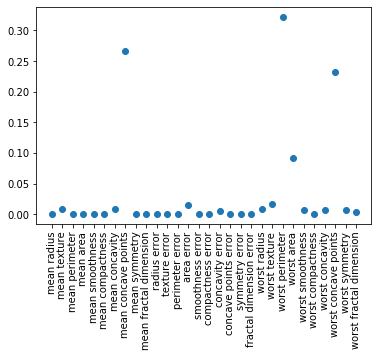

In [72]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

print("accuary on trainig set: %f" % gbrt.score(X_train, y_train))
print("accuary on test set: %f" % gbrt.score(X_test, y_test))

グラディエントブーストされたツリーの機能の重要性は、ランダムフォレストの機能の重要性にいくらか似ていますが、グラディエントブースティングは一部の機能を完全に無視しています。  

勾配ブースティングとランダムフォレストは同様の種類のデータで良好に機能するため、一般的なアプローチは、最初にランダムフォレストを試すことです。  
ランダムフォレストはうまく機能しているが、予測時間が貴重な場合、または機械学習モデルから最後の割合の精度を絞り出すことが重要な場合は、勾配ブースティングへの移行が役立つことがよくあります。  

大規模な問題に勾配ブースティングを適用したい場合は、xgboostパッケージとそのpythonインターフェースを調べる価値があります。  
これは、書き込み時に、scikit-learnの多くのデータセットでの勾配ブースティングの実装よりも高速です（場合によっては調整が簡単です）。

#### Strength,weaknesses and parameters

Gradient Boosted Decision Trees(勾配ブースト決定木)は、supervised learnig(教師あり学習)で最も強力で広く使用されているモデルの1つです。  

主な欠点は、パラメーターの注意深い調整が必要であり、トレーニングに長い時間がかかる場合があることです。  

他のツリーベースのモデルと同様に、このアルゴリズムは、スケーリングなしで、バイナリフィーチャーと連続フィーチャーの混合でうまく機能します。  
他のツリーベースのモデルと同様に、高次元のスパースデータでもうまく機能しないことがよくあります。  

勾配ブーストツリーモデルの主なパラメーターは、ツリーの数 n_estimators と、各ツリーが前のツリーの誤りを修正するために許可される量を制御する learning_rate です。  

learning_rate が低いほど、同様の複雑さのモデルを構築するにはより多くのツリーが必要であることを意味するため、これら2つのパラメーターは高度に相互に関連しています。  
n_estimators が高いほど常に良いランダムフォレストとは対照的に、勾配ブースティングでn_estimators を増やすと、モデルがより複雑になり、overftting(過剰適合)につながる可能性があります。  

一般的な方法は、時間とメモリバジェットに応じて n_estimators を近似し、さまざまなlearning_rate を検索することです。  

もう1つの重要なパラメーターは max_depth です。  
これは通常、勾配ブーストモデルでは非常に低く、多くの場合5つの分割よりも深くありません。

## Kernelized Support Vector Machines(カーネル化されたサポートベクターマシン)

これから説明する監視対象モデルの次のタイプは、カーネル化されたサポートベクターマシン（SVM）です。  

linear model(線形モデル)のセクションでは、分類用のlinear support vector machine(線形サポートベクターマシン)を既に説明しました。  
カーネル化されたsupport vector machine(サポートベクターマシン)（多くの場合、SVMと呼ばれることもある）は、入力空間の超平面だけで定義されていない、より複雑なモデルを可能にする拡張機能です。  
分類と回帰用のサポートベクターマシンがありますが、SVCで実装されているように、分類ケースに限定します。  
SVRに実装されているsupport voctor regression(サポートベクトル回帰)にも、同様の概念が適用されます。  
カーネル化されたサポートベクターマシンの背後にある数学は少し複雑であり、ほとんどがこの本の範囲を超えています。  

ただし、この方法の背後にある考え方について、いくつかの直感を提供するように努めます。

### Linear Model and Non-linear Features

図linear_classifiers(linear model classifications-P61)で見たように、線または超平面は柔軟性に制限があるため、低次元空間では線形モデルがかなり制限される可能性があります。  
線形モデルをより柔軟にする1つの方法は、たとえば、入力特徴の相互作用または多項式を追加するなど、特徴を追加することです。  

図tree_not_monotone(feature importance in trees-P81)で使用した合成データセットを見てみましょう。  

Text(0, 0.5, 'feature2')

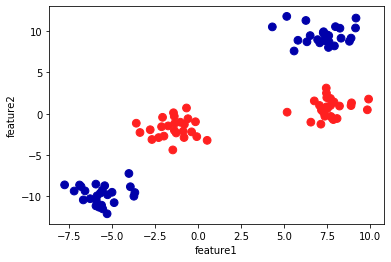

In [73]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

分類(classification)の線形モデルは、ラインを使用してポイントを分離することしかできず、このデータセットで非常に良い仕事をすることができません。  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature2')

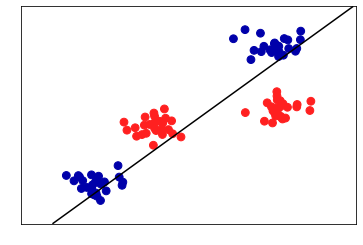

In [74]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1", color='white')
plt.ylabel("feature2", color='white')

次に、入力する特徴のセットを拡張します。たとえば、2番目の特徴の２乗であるfeature2 ** 2を新しいフィーチャとして追加します。  
各データポイントを2次元のポイント（feature1、feature2）として表すのではなく、3次元のポイント（feature1、feature2、feature2 ** 2）として表すようになりました  
（脚注：説明のためにこの特定の機能を選択して追加しました。選択は特に重要ではありません。）  
この新しい表現は、3次元散布図で以下に示されています。

Text(0.5, 0, 'feature1 ** 2')

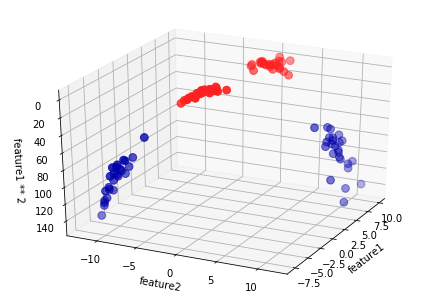

In [75]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

データの新しい3次元表現では、実際に赤と青のポイントを分離することが可能になりました。  

線形モデル、3次元の平面を使用します。これを確認するには、拡張モデルに線形モデルを当てはめます。

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

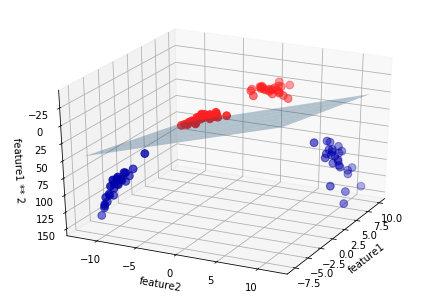

In [76]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show lonear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

元の機能の関数として、線形SVMモデルは実際にはもはや線形ではありません。それは線ではなく、楕円のようなものです。

Text(0, 0.5, 'feature2')

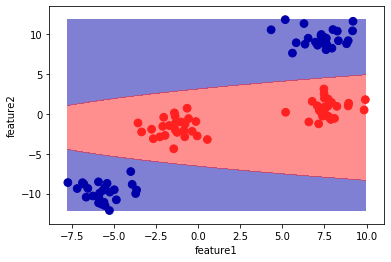

In [77]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

### The Kernel Trick

ここでの教訓は、データの表現に非線形機能を追加すると、線形モデルがはるかに強力になるということです。  
ただし、追加する機能がわからないことが多く、多くの機能（100次元の機能空間で可能なすべての相互作用など）を追加すると、計算が非常に高価になる可能性があります。  

幸いにも、実際には新しい非常に大きな表現を計算することなく、高次元の空間で分類子を学習できる巧妙な数学的トリックがあります。このトリックはkernel trick(カーネルトリック)として知られています。  

カーネルトリックは、拡張を実際に計算することなく、拡張されたフィーチャ表現のデータポイントの距離（より正確には、スカラー積）を直接計算することで機能します。  

サポートベクターマシンで一般的に使用されている高次元空間にデータをマッピングする方法は2つあります：  元の特徴のある次数までのすべての多項式を計算する多項式カーネル（feature1 ** 2 * feature2 ** 5のような）と、Gaussian Kernel(ガウスカーネル)としても知られている radial basis function(放射基底関数（rbf))カーネルです。  

ガウスカーネルは，無限次元の特徴空間に対応するので，説明が少し難しい。　　
ガウスカーネルを説明する1つの方法は，すべての次数の可能なすべての多項式を考慮するが，次数が高くなるほど特徴の重要性が低下するということである。  
［脚注：これは指数写像のテイラー展開に従う］　　

このすべてがあなたにとって数学的な話になってしまっても、心配しないでください。  
無限次元の特徴空間を想像しなくても、SVMを使うことができます。  
実際には、rbfカーネルを持つ SVM がどのように判断を下すかは、非常に簡単にまとめることができます。  

### Understanding SVMs

訓練中、SVM は訓練データポイントのそれぞれが 2 つのクラス間の決定境界を表すためにどれだけ重要であるかを学習します。  
通常、decision boundary(決定境界)を定義するために重要なのは学習点のサブセットのみです：クラス間の境界にあるものです。これらはsupport vectors(サポートベクトル)と呼ばれ、support vector machine(サポートベクトルマシン)の名前を与えます。  

新しい点の予測を行うために，support vectorsまでの距離を測定する．
この支持ベクトルまでの距離と、学習時に学習した支持ベクトルの重要度（SVCの dual_coef_attribute に格納）に基づいて、分類判定を行う。  

データポイント間の距離がGaussian Kernek(ガウスカーネル)によって測定される方法：  

\begin{align*}
&k_\text{rbf}(x_1, x_2) = \exp(\gamma||x_1 - x_2||^2) &\text{ (4) Gaussian kernel}
\end{align*}  

ここで、$x_1$ と $ x_2$ はデータポイント、$||x_1-x_2||$ はユークリッド距離、$\gamma$ はガウスカーネルの幅を制御するパラメーターです。  

以下は、2次元2クラスデータセットでサポートベクターマシンをトレーニングした結果です。  

決定境界は黒で示され、サポートベクトルは広い黒丸のある点です。

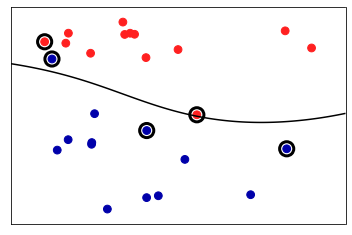

In [78]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none', zorder=10, linewidth=3,
           edgecolors='k')

この場合、SVMは非常に滑らかで非線形の（直線ではない）境界を生成します。  

ここで調整した2つのパラメーターがあります。Cパラメーターとgamma(ガンマ)パラメーターです。これらについては、後で詳しく説明します。  

### Tuning SVM parameters

ガンマパラメータは式(4)で示されるもので、ガウスカーネルの幅を制御します。これは、点が近接していることの意味の尺度を決定します。  

Cパラメータは線形モデルに似た正則化パラメータです。これは，各点の重要度を制限します（より正確には，それらの dual_coef_）。  

これらのパラメータを変化させるとどうなるかを見てみましょう。

Figure(1080x720)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa54315ecd0>


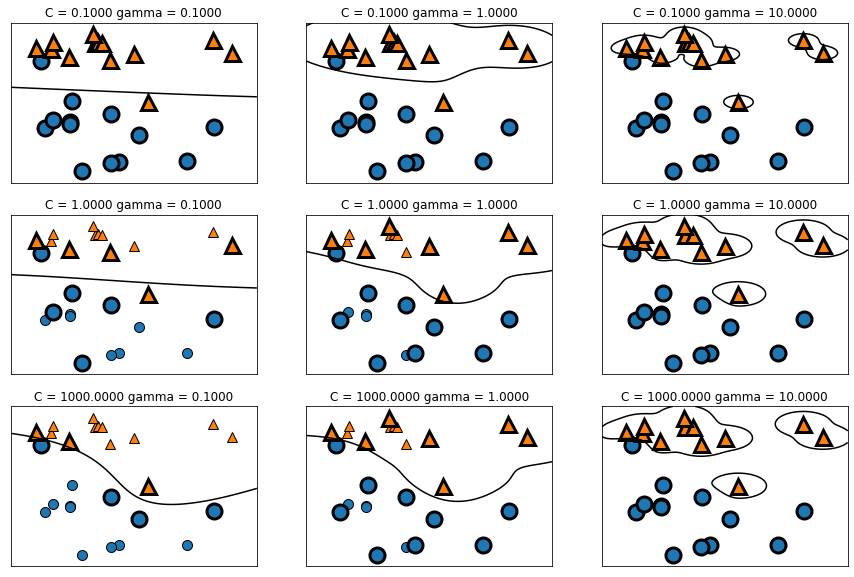

In [79]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
print(fig)
print(axes)
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

左から右に向かって、パラメーターガンマを0.1から10に増やします。　　
gamma(ガンマ)が小さいということは、ガウスカーネルの半径が大きいということです。　　
つまり、多くの点が近接していると見なされます。これは、左側の非常に滑らかな決定境界と、より右側の単一のポイントにより重点を置く境界に反映されています。　　
ガンマの値が低いと、決定境界の変化が遅くなり、モデルの複雑度が低くなり、ガンマの値が高いほど、モデルが複雑になります。　　

上から下に向かって、Cパラメータを0.1から1000に増やします。　　
線形モデルと同様に、小さなCは非常に制限されたモデルを意味し、各データポイントは非常に限られた影響のみを持つことができます。　　
左上にあるように、判定境界はほぼ線形に見え、誤分類された赤と青の点はほとんど線を変えていません。 

※C -> 正則化パラメーター。正則化の強度はCに反比例します。厳密に正でなければなりません。ペナルティは2乗のl2ペナルティです。[https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC]  

右下に示すように、Cを大きくすることで、これらの点がモデルに与える影響がより強くなり、判定境界が曲がり、正しく分類できるようになります。  

乳がんデータセットに rbf kernel SVM を適用してみましょう。デフォルトでは、C=1、γ=1./n_featuresとなっています。

In [80]:
X_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))

accuracy on training set: 0.903756
accuracy on test set: 0.937063


In [81]:
X_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target)

svc = SVC()
svc.fit(X_train, y_train)

print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))

accuracy on training set: 0.917840
accuracy on test set: 0.657343


モデルのオーバーフィットはかなりのもので、トレーニングセットでは満点、テストセットでは62％の精度しか得られませんでした。  

※random_state=0の時は、トレイニングセッでは約91%、テストセットでは約94%となり書籍通りではないが、random_state=default(この場合、記述しなくても良い)だと、トレイニングセットで約92%になり、テストセットで約58%となる。

SVM はしばしば非常に優れた性能を発揮しますが、パラメータの設定やデータのスケーリングに非常に敏感です。  
特に、すべての特徴が同じようなスケールで変化することが要求されます。各特徴の最小値と最大値を log-space(対数空間) でプロットしたものを見てみましょう。

X_train min:
 [7.691e+00 9.710e+00 4.792e+01 1.704e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
X_train max:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 5.963e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 1.252e+00 2.903e-01
 6.638e-01 1.730e-01]


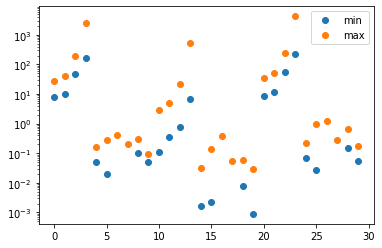

In [82]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")
print("X_train min:\n", X_train.min(axis=0))
print("X_train max:\n", X_train.max(axis=0))

このプロットから、乳がんデータセットの特徴が全く異なるオーダーの大きさであることがわかります。  

これは他のモデル（線形モデルなど）では多少問題になりますが、カーネルSVMでは壊滅的な効果があります。

### Preprocessing Data for SVMs(SVMのデータの事前処理)

この問題を解決する1つの方法は、各特徴がほぼ同じ縮尺になるように、各特徴を再スケーリングすることです。  

カーネルSVMの一般的な再スケーリング方法は、すべての特徴が0から1の間になるようにデータをスケーリングすることです。これを行う方法を見てみましょう。  
前処理の方法は、第3章（教師なし学習）で詳しく説明します。  

とりあえず「手で」やってみましょう。

In [83]:
# Compute the minimum value per feature on the training set
# traning setの特徴量ごとの最小値を計算します．
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
# training set上の各特徴の範囲（最大 - 最小）を計算します．
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, drive by range
# afterwards min=0 and max=1 for each feature
# 最小値を引いて、範囲で割る
# その後、各特徴量に対してmin=0、max=1
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [84]:
# use THE SAME transformation on the test set,
# uing min and range of the trainig set. 
# See Chapter 3 (unsuprtvised learning) for details.
# trainig setの最小値と範囲を用いて，
# teat setに同じ変換を使用します．
# 詳細は第3章(教師なし学習)を参照してください．
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

accuracy on training set: 0.983568
accuracy on test set: 0.650350


データのスケーリングで大きな違いが出た!   
今では、実際にはアンダーフィッティングの体制にあり、トレーニングセットとテストセットの性能は非常によく似ています。  
ここから、より複雑なモデルに適合させるために、Cまたはgammaを増加させてみることができます。

In [85]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.657343


ここで、Cを増加させることにより、モデルを大幅に改善し、97.2%の精度を得ることができます。

### Stengths, weaknesses and parameters
ここで、Cを増加させることにより、モデルを大幅に改善し、97.2%の精度を得ることができます。  
SVMは、たとえデータにいくつかの特徴しかない場合でも、非常に複雑な決定の境界を可能にします。  
SVMは、低次元および高次元のデータ（つまり、少数の特徴および多数の特徴）で適切に機能しますが、サンプル数に応じて適切にスケーリングすることはできません。　　
最大10000サンプルのデータで実行するとうまくいく場合がありますが、サイズが100000以上のデータセットでの作業は、ランタイムとメモリの使用量の点で困難になる可能性があります。　　

SVMのもう1つの欠点は、データの注意深い前処理とパラメーターの調整が必要なことです。　　

このため、多くのアプリケーションでは、SVMはランダムフォレスト（前処理がほとんどまたはまったく不要）などのツリーベースのモデルに置き換えられています。　　
さらに、SVMモデルは検査が困難です。　　
特定の予測がなされた理由を理解するのは困難な場合があり、モデルを専門家以外に説明するのは難しいかもしれません。　　

それでも、SVMを試してみる価値はあります。　　
特に、すべての機能が測定値を同様の単位で表し（つまり、すべてがピクセル強度であり）、同様のスケールである場合はなおさらです。　　

カーネルSVMの重要なパラメーターは、正則化(regularization)パラメーターC、カーネルの選択、およびカーネル固有のパラメーターです。　　
上記ではrbfカーネルについてのみ説明しましたが、scikit-learnでは他の選択肢も利用できます。   
rbfカーネルには、ガウスカーネルの幅の逆数であるgammaという1つのパラメータしかありません。  
gammaとCはどちらもモデルの複雑さを制御し、どちらかの値が大きいと、より複雑なモデルになります。  
したがって、通常、2つのパラメータの適切な設定は強く相関しており、Cとガンマを一緒に調整する必要があります。

## Neural Networks(Deep Learning)

ニューラルネットワークとして知られているアルゴリズムのファミリは、最近「ディープラーニング」という名前で復活しました。  

深層学習は多くの機械学習アプリケーションで大きな可能性を示していますが、多くの深層学習アルゴリズムは特定のユースケースに非常に注意深く調整されています。  
ここでは、比較的複雑なディープラーニングメソッドの開始点として機能する、比較的単純ないくつかのメソッド、つまり分類と回帰の Multilayer perceptrons(多層パーセプトロン)についてのみ説明します。  
多層パーセプトロン（MLP）は（バニラ）feed-forward neural networks(フィードフォアワードニューラルネットワーク)または単に neural networks(ニューラルネットワーク)とも呼ばれます。

### The Neural Network Model

MLPは、決定に至るまでの処理の複数の段階を実行する線形モデルの一般化と見なすことができます。  

線形回帰による予測は次のように与えられることを覚えておいてください。  
つまり、yは、学習された係数w[0]からw[p]によって重み付けされた入力特徴x[0]からx[p]の重み付き合計です。  
これをグラフィカルに視覚化できます。

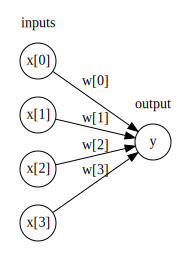

In [86]:
mglearn.plots.plot_logistic_regression_graph()

ここで、左側の各ノードは入力特徴を表し、接続線は学習された係数を表し、右側のノードは出力を表します。これは、入力の重み付けされた合計です。  

MLPでは、加重和(weighted sum)を計算するこのプロセスが複数回繰り返されます。   
最初に中間の処理ステップを表す隠し単位を計算します。  
これは、加重和を使用して再び結合され、最終結果を生成します。

Figure single_hidden_layer


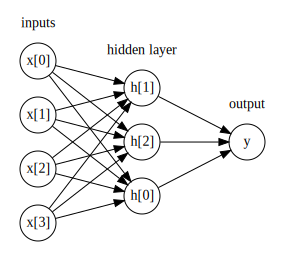

In [87]:
print("Figure single_hidden_layer")
mglearn.plots.plot_single_hidden_layer_graph()

このモデルには、学習する係数（重みとも呼ばれる）がさらに多くあります。  
すべての入力とすべての非表示ユニット（非表示層を構成する）の間に1つ、および非表示層のすべてのユニットと出力の間に1つあります。  

一連の加重和を計算することは、数学的には1つの加重和を計算することと同じです。  
そのため、このモデルを線形モデルよりも本当に強力にするためには、もう1つのトリックが必要です。  
非表示の各ユニットの重み付けされた合計を計算した後、結果に非線形関数が適用されます。  
通常、これは rectifying nonlinearity(整流非線形性)（ rectifield linear unit または relu とも呼ばれます）  
または tangens hyperbolicus (正接双曲線)（tanh）です。この関数の結果は、出力yを計算する加重和(weighted sum)で使用されます。  

2つの関数は、図activation_functionsで視覚化されています。  
reluはゼロ未満の値をカットオフし、tanhは低い入力値の場合は-1に、高い入力値の場合は+1に飽和します。  
どちらの非線形関数でも、ニューラルネットワークは線形モデルよりもはるかに複雑な関数を学習できます。

Text(0.5, 1.0, 'activation_functions')

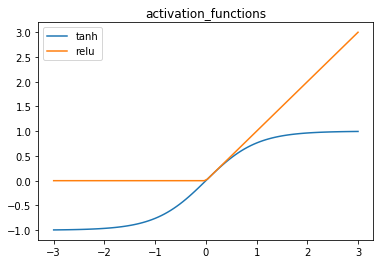

In [88]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

上記の図single_hidden_layerの小さなニューラルネットワーク画像の場合、回帰の場合のyを計算する完全な式は次のようになります（tanh非線形性を使用する場合）。  

ここで、wは入力xと隠れ層hの間の重みであり、vは隠れ層hと出力yの間の重みです。  
重みvとwはデータから学習され、xは入力特徴、yは計算された出力、hは中間計算です。  

ユーザーが設定する必要がある重要なパラメーターは、非表示レイヤーのノード数であり、非常に小さいまたは単純なデータセットの場合は10まで、非常に複雑なデータの場合は10000まで大きくすることができます。  

下の図のtwo_hidden_layersのように、隠れ層をさらに追加することもできます。  
これらの計算層の多くで構成される大規模なニューラルネットワークを持つことは、「ディープラーニング」という用語の着想を得ています。

Figure two_fidden_layers


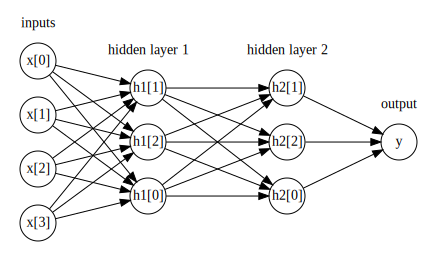

In [89]:
print("Figure two_fidden_layers")
mglearn.plots.plot_two_hidden_layer_graph()

### Turning Neural Networks

上記で見たtwo_moonsデータセットにMLPClassifierを適用して、MLP(multilayer perceptrons(多層パーセプトロン))の仕組みを見てみましょう。

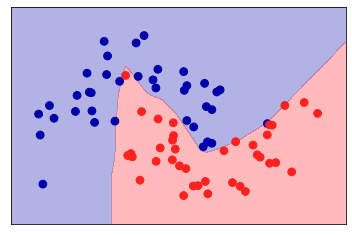

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

ご覧のとおり、ニューラルネットワークは非常に非線形ですが、比較的滑らかな決定境界を学習しました。  

後で説明するsolver = 'lbfgs'を使用しました。  

デフォルトでは、MLPは100個の非表示ノードを使用します。  
これは、この小さなデータセットにはかなりの量です。  
数を減らし（モデルの複雑さを減らします）、それでも良い結果を得ることができます：

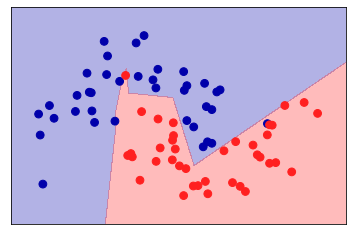

In [91]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

非表示のユニットが10個しかないため、決定境界はやや不規則に見えます。  
図のactivation_functionに示すように、デフォルトの非線形性は「relu」です。  
単一のhidden_layer(隠しレイヤー)では、これは決定関数が10個の直線セグメントで構成されることを意味します。   
よりスムーズな決定境界が必要な場合は、（上の図のように）非表示の単位を追加するか、2番目の非表示レイヤーを追加するか、「tanh」非線形性を使用できます。

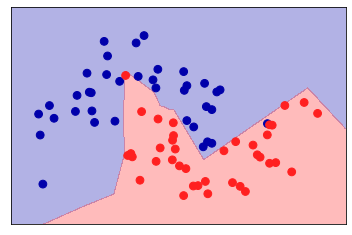

In [92]:
# それぞれ10ユニットの2つの非表示レイヤーを使用
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

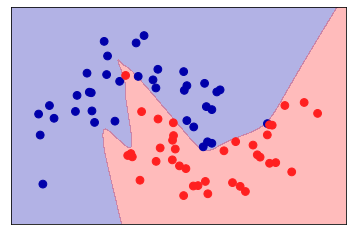

In [93]:
# それぞれ10ユニットの2つの非表示層を使用し、tanh非線形性を使用します。
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0,
                   hidden_layer_sizes=[10, 10])

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

最後に、リッジ回帰と線形分類器で行ったように、「l2」ペナルティを使用して重みをゼロに縮小することにより、ニューラルネットワークの複雑さを制御することもできます。  
MLPClassifierのこのパラメーターは（線形回帰モデルの場合のように）alphaであり、デフォルトでは非常に低い値（少し正則化）に設定されています。  

これは、two_moonsデータセットに対するアルファのさまざまな値の影響です。  
それぞれ10または100ユニットの2つの非表示レイヤーを使用しています。

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

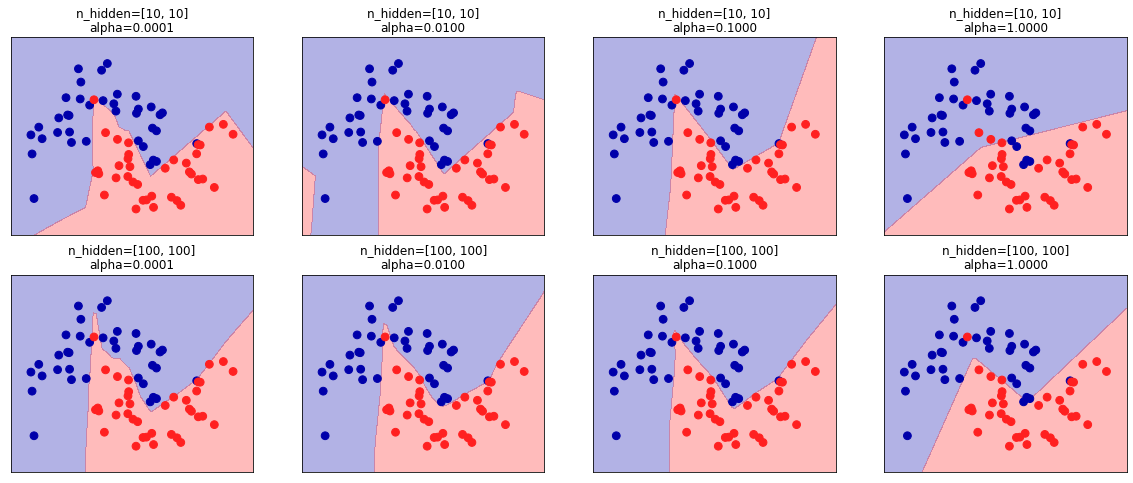

In [94]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
                    % (n_hidden_nodes, n_hidden_nodes, alpha))

おそらくこれまでに気付いたように、ニューラルネットワークの複雑さを制御する方法はたくさんあります。  
非表示層の数、各非表示層のユニット数、正則化（アルファ）です。実際にはさらに多くありますが、ここでは説明しません。  

ニューラルネットワークの重要な特性は、学習が開始される前に重みがランダムに設定され、このランダムな初期化が学習されるモデルに影響を与えることです。  
つまり、まったく同じパラメーターを使用する場合でも、異なるランダムシードを使用すると、非常に異なるモデルを取得できます。  

ネットワークが大きく、その複雑さが適切に選択されている場合、これは精度にあまり影響しないはずですが、（特に小規模なネットワークの場合）留意する価値があります。  

以下は、同じパラメータ設定で学習したいくつかのモデルのプロットです。

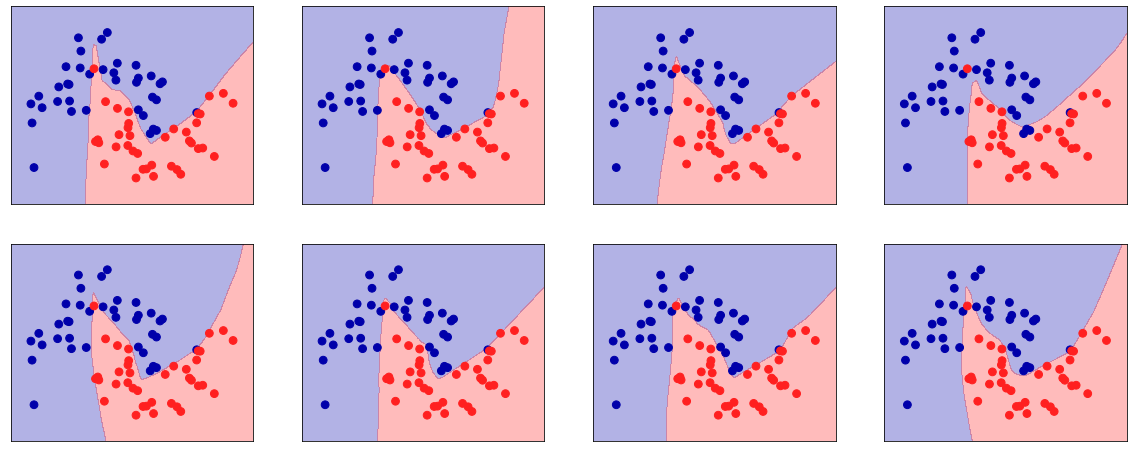

In [95]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

実際のデータのニューラルネットワークをよりよく理解するために、MLPClassifierを乳がんデータセットに適用してみましょう。デフォルトのパラメータから始めます。

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print("accuracy on training set: %f" % mlp.score(X_train, y_train))
print("accuracy on test set: %f" % mlp.score(X_test, y_test))

accuracy on training set: 0.920188
accuracy on test set: 0.944056


ご覧のように、トレーニングとテストセットの両方の結果は、破壊的に悪くなっています（ランダムな推測よりもさらに悪い！）。  
上記のSVCの例のように、これはおそらくデータのスケーリングによるものです。  
ニューラルネットワークもすべての入力特徴が同様に変化することを期待しており、理想的には平均が0で分散が1である必要があります。  

これらの要件を満たすようにデータを再スケーリングする必要があります。  
繰り返しますが、ここでは「手動」で行いますが、第3章（教師なし学習）でこれを自動的に行うようにStandardScalerを導入します。

In [97]:
# トレーニングセットの特徴ごとの平均値を計算する
mean_on_train = X_train.mean(axis=0)
# トレーニングセットの各特徴の標準偏差を計算する
std_on_train = X_train.std(axis=0)

# 平均を差し引き、逆標準偏差でスケールします
# その後、mean = 0およびstd = 1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# テストセットで同じ変換（トレーニング平均と標準を使用）を使用する
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


スケーリング後の結果ははるかに良くなり、すでに非常に競争力があります。  
ただし、モデルから警告が表示され、最大反復回数に達したことがわかります。  
これはモデルを学習するためのadamアルゴリズムの一部であり、反復回数を増やす必要があることを示しています。

In [98]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


反復回数を増やしても、トレーニングセットのパフォーマンスは向上しましたが、汎化のパフォーマンスは向上しませんでした。  
それでも、モデルは非常にうまく機能しています。  
トレーニングとテストのパフォーマンスの間にギャップがあるため、モデルの複雑さを減らして、汎化のパフォーマンスを向上させることができます。  
ここでは、重みのより強い正則化を追加するために、アルファパラメーターを（かなり積極的に、0.0001から1に）増やすことを選択します。

In [99]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.972028


これは、これまでの最高のモデルと同等のパフォーマンスにつながります。　　
［脚注：この時点で、パフォーマンスの高いモデルの多くがまったく同じ精度の0.972を達成していることに気づいたかもしれません。　　
これは、すべてのモデルが正確に同じ数の誤りを犯すことを意味します。　　
実際の予測を比較すると、まったく同じ間違いをしていることがわかります！　　
これは、データが非常に小さい結果であるか、これらの点が他の点と実際に異なるためである可能性があります。］　　

ニューラルネットワークが何を学習したかを分析することは可能ですが、これは通常、線形モデルやツリーベースのモデルを分析するよりもはるかに厄介です。  
学習したことを内省する1つの方法は、モデルの重みを見ることです。  
この例は、ウェブサイトのscikit-learnのサンプルギャラリーで見ることができます。  
乳がんのデータセットでは、少しわかりにくいかもしれません。  

以下のプロットは、入力を最初の非表示レイヤーに接続して学習された重みを示しています。  

このプロットの行は30の入力フィーチャに対応し、列は100の非表示単位に対応します。  
明るい緑は大きな正の値を表し、濃い青は負の値を表します。

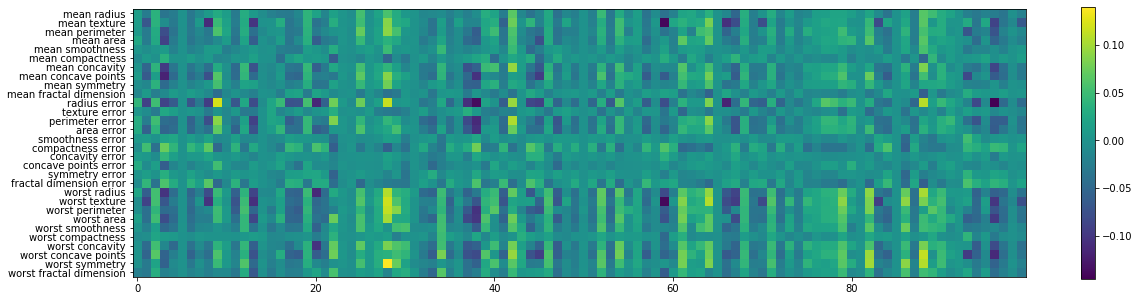

In [100]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

考えられる1つの推論は、すべての非表示単位に対して非常に小さい重みを持つフィーチャは、モデルにとって「重要度が低い」ということです。  
「smoothness error(平滑度誤差)」と「fractal dimension error(フラクタル次元誤差)」の間にある特徴に加えて、「mean smoothness(平均平滑度)」と「mean compactness(平均コンパクト度)」は、他の特徴に比べて重みが比較的低いことがわかります。  
これは、これらがそれほど重要ではない機能であること、またはおそらく、ニューラルネットワークが使用できる方法でそれらを表現しなかったことを意味します。  

非表示レイヤーと出力レイヤーを接続する重みを視覚化することもできますが、それらを解釈することはさらに困難です。  

MLPClassifierとMLPRegressorは、最も一般的なニューラルネットワークアーキテクチャに使いやすいインターフェースを提供しますが、ニューラルネットワークで可能なことのごく一部のみをキャプチャします。  
より柔軟なモデルやより大きなモデルでの作業に興味がある場合は、scikit-learnを超えて、そこにある素晴らしいディープラーニングライブラリを調べることをお勧めします。  
Pythonユーザーの場合、最も確立されているのはkeras、lasagna、およびtensor-flowです。  
Kerasとlasagnaはどちらもtheanoライブラリをベースにしています。

これらのライブラリは、ニューラルネットワークを構築し、ディープラーニング研究の迅速なプロセスを追跡するためのはるかに柔軟なインターフェイスを提供します。  
人気のあるディープラーニングライブラリはすべて、scikit-learnがサポートしていない高性能グラフィックプロセッシングユニット（GPU）の使用も許可します。  

GPUを使用すると、計算を10倍から100倍に高速化でき、大規模なデータセットにディープラーニング手法を適用するために不可欠です。

### Strengths, weaknesses and parameters

ニューラルネットワークは、機械学習の多くのアプリケーションで最先端のモデルとして再登場しています。  
主な利点の1つは、大量のデータに含まれている情報をキャプチャして、信じられないほど複雑なモデルを構築できることです。  
十分な計算時間、データ、およびパラメーターの注意深い調整が与えられた場合、ニューラルネットワークは、他の機械学習アルゴリズム（分類および認識タスク用）に勝ることがよくあります。  

これは私たちにマイナス面をもたらします。  
ニューラルネットワーク、特に大きくて強力なものは、トレーニングに長い時間がかかることがよくあります。  
また、前述のように、データの慎重な前処理も必要です。  
SVMと同様に、すべての機能が同様の意味を持つ「同種の」データで最もよく機能します。  
非常に異なる種類の機能を持つデータの場合、ツリーベースのモデルがより適切に機能する場合があります。  

ニューラルネットワークのパラメーターの調整も、それ自体が技術です。  
上記の実験では、ニューラルネットワークモデルを調整するための可能な方法と、それらをトレーニングする方法の表面をかろうじて引っ掻きました。  

**Estimating complxity in neural networks(ニューラルネットワークの複雑さの推定
)**

最も重要なパラメーターは、レイヤーの数とレイヤーごとの非表示のユニットの数です。  
1つまたは2つの非表示のレイヤーから開始し、そこから展開する必要があります。  
多くの場合、非表示レイヤーあたりのノード数は入力フィーチャの数とほぼ同じですが、数千から数千の場合よりも少ない場合があります。  

ニューラルネットワークのモデルの複雑さを考えるときに役立つ指標は、学習される重みまたは係数の数です。  
100個の特徴を持つバイナリ分類データセットがあり、100個の非表示単位がある場合、入力と最初の非表示レイヤーの間に100 * 100 = 10,000の重みがあります。  
また、隠しレイヤーと出力レイヤーの間に100 * 1 = 100のウェイトがあり、合計で約10,100のウェイトになります。  
100の非表示ユニットを持つ2番目の非表示レイヤーを追加すると、最初の非表示レイヤーから2番目の非表示レイヤーに100 * 100 = 10,000のウェイトが追加され、合計で20,100のウェイトになります。  

代わりに、1000の非表示単位を持つ1つのレイヤーを使用する場合、100 * 1000 = 100,000のウェイトが入力レイヤーから非表示レイヤーに、1000 x 1のウェイトが非表示レイヤーから出力レイヤーに学習され、合計で101,000になります。  

2番目の非表示レイヤーを追加する場合は、1,000 * 1000 = 1,000,000の重みを追加します。  
これは、なんと1,101,000で、サイズ100の2つの非表示レイヤーを持つモデルの50倍です。  

ニューラルネットワークでパラメーターを調整する一般的な方法は、最初にオーバーフィットするのに十分な大きさのネットワークを作成し、ネットワークによってタスクが実際に学習できることを確認することです。  
トレーニングデータを学習できることがわかったら、ネットワークを縮小するか、アルファを増やして正則化を追加します。これにより、汎化パフォーマンスが向上します。  

上記の実験では、モデルの定義に主に焦点を当てました。  
レイヤーの数とレイヤーあたりのノード数、正則化、および非線形性です。  
これらは、学習したいモデルを定義します。  
また、アルゴリズムパラメータを使用して設定されたモデル、またはパラメータの学習に使用されるアルゴリズムを学習する方法の問題もあります。  

アルゴリズムには2つの使いやすい選択肢があります。  
デフォルトは 'adam'で、ほとんどの状況で適切に機能しますが、データのスケーリングに非常に敏感です（そのため、データを常にゼロ平均と単位分散にスケーリングすることが重要です）。  
もう1つは非常に堅牢な「l-bfgs」ですが、大きなモデルや大きなデータセットでは時間がかかる場合があります。  

より高度な「sgd」オプションもあります。  
これは、多くのディープラーニング研究者が使用しているものです。  
「sgd」オプションには、最良の結果を得るために調整する必要がある多くの追加パラメーターが付属しています。  
これらすべてのパラメーターとその定義は、ユーザーガイドに記載されています。  
MLP(Multilayer perceptrons(多層パーセプトロン))の使用を開始するときは、adamとl-bfgsを使用することをお勧めします。 

### Uncertainty estimates from classifier(分類子からの不確かさの推定)

まだ説明していないscikit-learnインターフェースのもう1つの便利な部分は、予測の不確実性推定を提供する分類子の機能です。  

多くの場合、分類子が特定のテストポイントに対して予測するクラスだけでなく、これが正しいクラスであることがどれほど確実であるかにも関心があります。  
実際には、さまざまな種類のミスが、実際のアプリケーションでは非常に異なる結果をもたらします。  
がんの医療アプリケーションテストを想像してみてください。偽陽性の予測を行うと、患者が追加の検査を受ける可能性がありますが、偽陰性の予測を行うと、治療されていない深刻な疾患につながる可能性があります。  

このトピックについては、第6章（モデルの選択）で詳しく説明します。  

scikit-learnには、分類子から不確実性推定を取得するために使用できる2つの異なる関数、decision_functionとpredict_probaがあります。  
ほとんどの（すべてではない）分類子には少なくとも1つがあり、多くの分類子には両方があります。  
GradientBoostingClassifier分類器を構築するときに、これらの2つの関数が合成2次元データセットとして何を行うかを見てみましょう。  
GradientBoostingClassifierには、decision_functionメソッドとpredict_probaの両方があります。

In [101]:
# 合成データセットを作成して分割する
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
# from sklearn.model_selection import train_test_split
# import numpy as np

# X, y = make_blobs(centers=2, radom_state=59)
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 説明のために、クラスの名前を「blue」と「red」に変更します。
y_named = np.array(["blue", "red"])[y]

# 任意の多くの配列を使用して、train test splitを呼び出すことができます
# すべてが一貫した方法で分割されます
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# gtadient boosting model(勾配ブースティングモデル)を構築する
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          presort='auto', random_state=0, subsample=1.0, verbose=0,
                          warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### The Decision Function(決定関数)

バイナリ分類の場合、decision_functionの戻り値は形状（n_samples）であり、サンプルごとに1つの浮動小数点数を返します。  

In [102]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


この値は、モデルがデータポイントを「positive(ポジティブ)」クラス（この場合はクラス1）に属していると強く信じていることをエンコードします。  

正の値は正のクラスの優先を示し、負の値は「negative(負)」の優先を示します。つまり、他のクラスです。

In [103]:
# Decision_functionの最初のいくつかのエントリを表示する
gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

decision function(決定関数)の符号のみを見て予測を回復できます。

In [104]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


バイナリ分類の場合、「negative(否定)」クラスは常にclasses_属性の最初のエントリであり、「positive(肯定)」クラスはclasses_の2番目のエントリです。  
したがって、predictの出力を完全に回復するには、classes_属性を使用する必要があります。

In [105]:
# ブール値のTrue / Falseを0と1にします
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# classes_へのインデックスとして0と1を使用します
pred = gbrt.classes_[greater_zero]

# predはgbrt.predictの出力と同じです
np.all(pred == gbrt.predict(X_test))

True

Decision_functionの範囲は任意であり、データとモデルパラメーターによって異なります。

In [106]:
decision_function = gbrt.decision_function(X_test)
np.min(decision_function), np.max(decision_function)

(-7.69097177301218, 4.289866676868515)

この任意のスケーリングにより、decision_functionの出力を解釈することが困難になることがよくあります。  

以下では、第2章で見たように、決定境界の視覚化の隣に、色分けを使用して2d平面のすべての点のdecision_functionをプロットします。  
訓練点を円として、テストデータを三角形として示します  

予測される結果だけでなく、分類子がどれほど確実であるかをエンコードすることで、追加情報が提供されます。  
ただし、この視覚化では、2つのクラス間の境界を明確にするのは困難です。  

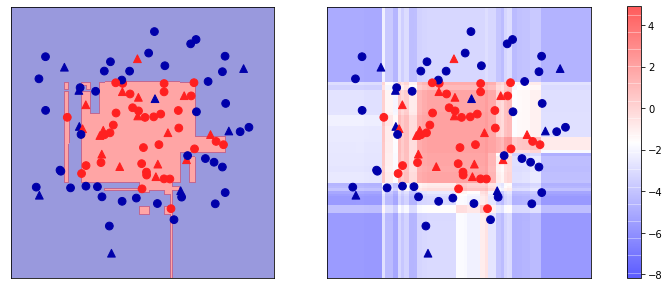

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')

for ax in axes:
    # トレーニングポイントとテストポイントのプロット
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)

plt.colorbar(scores_image, ax=axes.tolist())

### Perdicting probabilities(確率の予測)

ただし、predict_probaの出力は各クラスの確率であり、多くの場合、より簡単に理解できます。  
バイナリ分類では常に形状（n_samples、2）です：

In [108]:
gbrt.predict_proba(X_test). shape

(25, 2)

各行の最初のエントリは最初のクラスの推定確率、2番目のエントリは2番目のクラスの推定確率です。  
これは確率であるため、predict_probaの出力は常に0から1の間であり、両方のクラスのエントリの合計は常に1です。

In [109]:
np.set_printoptions(suppress=True, precision=3)

# predict_probaの最初のいくつかのエントリを表示する
gbrt.predict_proba(X_test[:6])

array([[0.016, 0.984],
       [0.846, 0.154],
       [0.981, 0.019],
       [0.974, 0.026],
       [0.014, 0.986],
       [0.025, 0.975]])

2つのクラスの確率の合計は1であるため、クラスの1つだけが50％の確実性を超えています。  
そのクラスは予測されるクラスです。  

上記の出力から、ほとんどの点で分類子が比較的確実であることがわかります。  
不確実性が実際にデータの不確実性をどの程度反映しているかは、モデルとパラメーターによって異なります。  
モデルがオーバーフィットであるほど、たとえ間違っていても、より確実な予測を行う傾向があります。  
複雑さが少ないモデルは通常、予測の不確実性が高くなります。  
報告された不確実性が実際にどれほど正確であるかが実際に一致する場合、モデルはcaliblated(較正済み)と呼ばれます。  
caliblated(較正済み)モデルでは、70％の確実性で行われた予測は、70％の確率で正確です。  

以下に、青いクラスのクラス確率の横にある、データセットの決定境界を再度示します。

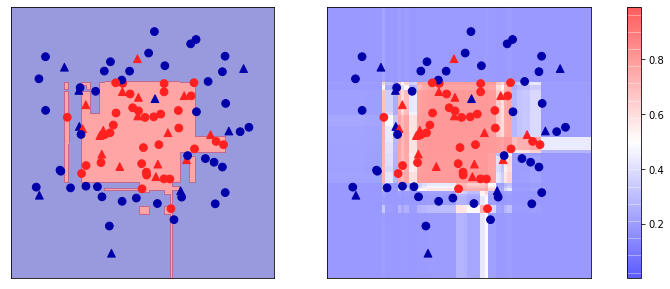

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
                                         cm='bwr', function='predict_proba')

for ax in axes:
    # トレーニングポイントとテストポイントのプロット
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)

plt.colorbar(scores_image, ax=axes.tolist())

このプロットの境界ははるかに明確であり、不確実性の小さな領域がはっきりと見えます。  

scikit-learnのWebサイト［脚注：http://scikit-learn.org/stable/auto_examples/clas‐sification/plot_classifier_comparison.html］　は、多くのモデルの優れた比較と、それらの不確かさの推定がどのように見えるかを示しています。　　

下の図を再現しましたので、そこの例を参考にしてください。  

<!-- ![](plot_classifier_comparison.png) -->
<!-- <img src="./plot_classifier_comparison.png"> -->

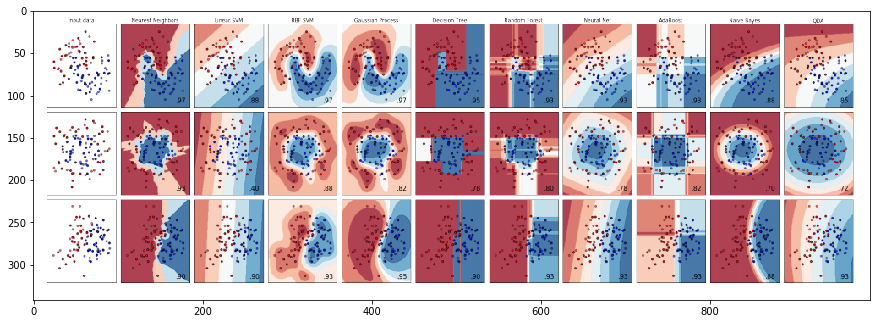

In [111]:
file_name = "images/plot_classifier_comparison.png"
pcc = plt.imread(file_name)
plt.figure(figsize=(15,8))
plt.imshow(pcc)

### Uncertainty in multi-class classification(マルチクラス分類の不確実性)

上記では、バイナリ分類の不確実性推定についてのみ説明しました。  
ただし、decision_functionメソッドとpredict_probaメソッドは、マルチクラス設定でも機能します。  

3つのクラスの分類データセットであるアヤメのデータセットにそれらを適用してみましょう。

In [112]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          presort='auto', random_state=0, subsample=1.0, verbose=0,
                          warm_start=False)

print(gbrt.decision_function(X_test).shape)
# 決定関数の最初の数エントリをプロットする
print(gbrt.decision_function(X_test)[:6, :])

(38, 3)
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


マルチクラスの場合、decision_functionの形状は（n_samples、n_classes）であり、各列は各クラスの「certainy score(確実性スコア)」を提供します。  
ここで、スコアが大きいとクラスの可能性が高くなり、スコアが小さいとクラスの可能性が低くなります。  
各データポイントの最大エントリを見つけることにより、これらのスコアから予測を回復できます。

In [113]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_probaの出力は同じ形状（n_samples、n_classes）を持っています。ここでも、各データポイントの可能なクラスの確率の合計は1です。

In [114]:
# predict_probaの最初のいくつかのエントリを表示する
print(gbrt.predict_proba(X_test)[:6])
# 行全体の合計が1であることを示す
print("sums: %s" % gbrt.predict_proba(X_test)[:6].sum(axis=1))

[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
sums: [1. 1. 1. 1. 1. 1.]


predict_probaのargmaxを計算することにより、予測を再び回復できます。

In [115]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


要約すると、predict_probaとDecision_functionは、常に（n_sam ples、n_classes）の形をしています-バイナリの場合のDecision_functionの特別な場合は別です。  
バイナリの場合、decision_functionには「positive」クラスのclasses_[1]に対応する1つの列しかありません。これは主に歴史的な理由によるものです。  

列全体でargmaxを計算するだけで、n_classes列が多い場合に予測を回復できます。  

ただし、クラスが文字列である場合、または整数を使用しているが、それらが連続しておらず、0から始まっている場合は注意してください。  
predictを使用して取得した結果を、decision_functionまたはpredict_probaを介して取得した結果と比較する場合は、分類子のclasses_属性を使用して実際のクラス名を取得してください。

### Smmary and Outlook(要約と展望)

この章では、モデルの複雑さの説明から始め、一般化、つまり、目に見えない新しいデータに対して適切に実行できるモデルの学習について説明しました。  
これは、トレーニングデータに存在する変動をキャプチャできないモデルを説明するアンダーフィッティングとオーバーフィッティングの概念につながりました。  
これは、トレーニングデータに集中しすぎて、新しいデータにうまく一般化できないモデルを表しています。  

次に、分類と回帰のさまざまな機械学習モデル、それらの長所と短所、およびそれぞれのモデルの複雑さを制御する方法について説明しました。  

多くのアルゴリズムでは、適切なパラメーターを設定することがパフォーマンスを向上させるために重要であることがわかりました。  
一部のアルゴリズムは、入力データの表現方法、特に機能のスケーリング方法にも敏感です。  

したがって、モデルが行う仮定やパラメータ設定の意味を理解せずにアルゴリズムをデータセットに盲目的に適用しても、正確なモデルにつながることはほとんどありません。  

この章では、アルゴリズムに関する多くの情報が含まれています。  
次の章のために、これらの詳細をすべて覚えておくことが大切です。  
しかし上記のモデルを知り、特定の状況でどのモデルを使うべきかを知ることは、実際に機械学習をうまく適用するために重要です。  
次に、どのモデルをいつ使用するかを簡単にまとめます。  

- Nearest neighbors(最近傍)：  
小さいデータセットの場合、ベースラインとしては適切で、説明が簡単です。  

- linear model(線形モデル)：  
最初に試すアルゴリズムとして、非常に大きなデータセットに適しています。非常に高次元のデータに適しています。   

- Naive Bayes(単純ベイズ)：  
分類のみ。線形モデルよりも高速で、非常に大きな高次元データに適しています。多くの場合、線形モデルよりも精度が低くなります。  

- Decision trees(決定木)：  
非常に高速で、データのスケーリングが不要で、視覚化して簡単に説明できます。  

- Random forests(ランダムフォレスト)：  
ほとんどの場合、単一の決定木よりもパフォーマンスが高く、非常に堅牢で強力です。データのスケーリングは必要ありません。非常に高次元のスパースデータには適していません。  

- Gradient Boosted Decision Trees(勾配ブースト決定木)：  
多くの場合、ランダムフォレストよりもわずかに正確です。トレーニングは遅くなりますが、ランダムフォレストよりも予測が速く、メモリが小さくなります。ランダムフォレストよりも多くのパラメーター調整が必要です。  

- Surport Vector Machines(サポートベクターマシン: SVM)：  
同じような意味を持つ特徴の中規模のデータセットに強力です。パラメータに敏感なデータのスケーリングが必要です。  

- Neural Networks(ニューラルネットワーク)：  
特に大規模なデータセットの場合、非常に複雑なモデルを構築できます。データのスケーリングとパラメータの選択に敏感です。大きなモデルはトレーニングに長い時間が必要です。  

新しいデータセットを使用する場合、一般的には、線形モデル、単純ベイズ、最近傍などの単純なモデルから始めて、到達距離を確認することをお勧めします。  
データについてさらに理解したら、ランダムフォレスト、勾配ブースティング、SVM、ニューラルネットワークなどのより複雑なモデルを構築できるアルゴリズムへの移行を検討できます。  

これで、上で説明したモデルを適用、調整、および分析する方法についてのアイデアが得られる位置にいるはずです。  

この章では、バイナリ分類のケースに焦点を当てました。これは通常、最も理解しやすいためです。  
上記のアルゴリズムのほとんどには分類と回帰のバリアントがあり、すべての分類アルゴリズムはバイナリとマルチクラスの両方の分類をサポートしています。   

これらのアルゴリズムのいずれかをscikit-learnの組み込みデータセットに適用してみてください。  
たとえば、回帰のboston_housingデータセットやdiabetes(糖尿病)データセット、マルチクラス分類の数字データセットなどです。  

さまざまなデータセットのアルゴリズムをいじると、トレーニングに必要な時間、モデルの分析のしやすさ、データの表現に対する感度がどの程度かについて理解が深まります。  

調査したアルゴリズムのさまざまなパラメーター設定の影響を分析しましたが、実際に新しいデータにうまく一般化するモデルを構築することは、それよりも少しトリッキーです。  
パラメータを適切に調整する方法、および適切なパラメータを自動的に見つける方法については、第6章の「モデルの選択」で説明します。  

これを行う前に、次の章でpreprocessing(前処理)とunsupervised learning(教師なし学習)について詳しく説明します。